# **Proyecto No. 4 Data & Analytics**

## **Alumno: Israel Vargas Casimiro** 

### **Link GitHub:** https://github.com/israelvc8214/Proyecto-No.-4

## **RETO:** 
### Se tiene un conjunto de datos simulado basado en seis meses de la información recogida por una aseguradora mundial llamada “SALUD Y SEGUROS”, cuyo objetivo fue desarrollar un modelo para determinar la probabilidad de siniestro en los próximos 12 meses. 
### La variable de interés es la siniestralidad , que representa el estado binario de No Siniestro 0 y Siniestro 1.
## **DESCRIPCIÓN DEL PROBLEMA**
### Los modelos analíticos para el manejo de los seguros de accidentes se están usando por muchas instituciones y están dando resultados exitosos en todo el mundo. Los modelos analíticos se pueden definir como un conjunto de métodos y técnicas cuantitativas usados para predecir la probabilidad de que un cliente falle (Sea siniestroso) y en consecuencia no se recupere el rédito otorgado por la empresa.
## **ENTREGABLE:**
### 1. Desarrollar el modelo basado en la metodología CRISP-DM.
#### - Realizar el análisis exploratorio de datos (EDA) con la variable dependiente (Target) e interpretar los hallazgos.
#### - Identificar las variables más importantes
#### - Realizar la segmentación de clientes.
#### - Incluir la variable segmento como una variable cualitativa en el modelo final.



## Análisis exploratorio de datos (EDA) con la variable dependiente target

In [ ]:
# Importamos librerias para el tratamiento inicial de los datos 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para utilizar el archivo Siniestros.csv, en un caso personal, yo lo subí a GitHub por cuestiones de practicidad. En este sentido,
# vamos a generar el primer dataframe a partir del archivo almacenado en el repositorio mencionado. Como el archivo viene separado
# por punto y coma, vamos a ingresar el separador "sep", seguido por el punto y coma. 
csv_path = ('https://raw.githubusercontent.com/israelvc8214/Proyecto-No.-4/main/Siniestros.csv')
df = pd.read_csv(csv_path, sep=';')
df

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,789697,13.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,NaN
5796,789964,2.0,0.0,2196.94,0,0.0,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5797,790092,4.0,2.0,805.72,0,0.0,0.0,0.0,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5798,790346,0.0,NaN,0.01,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN


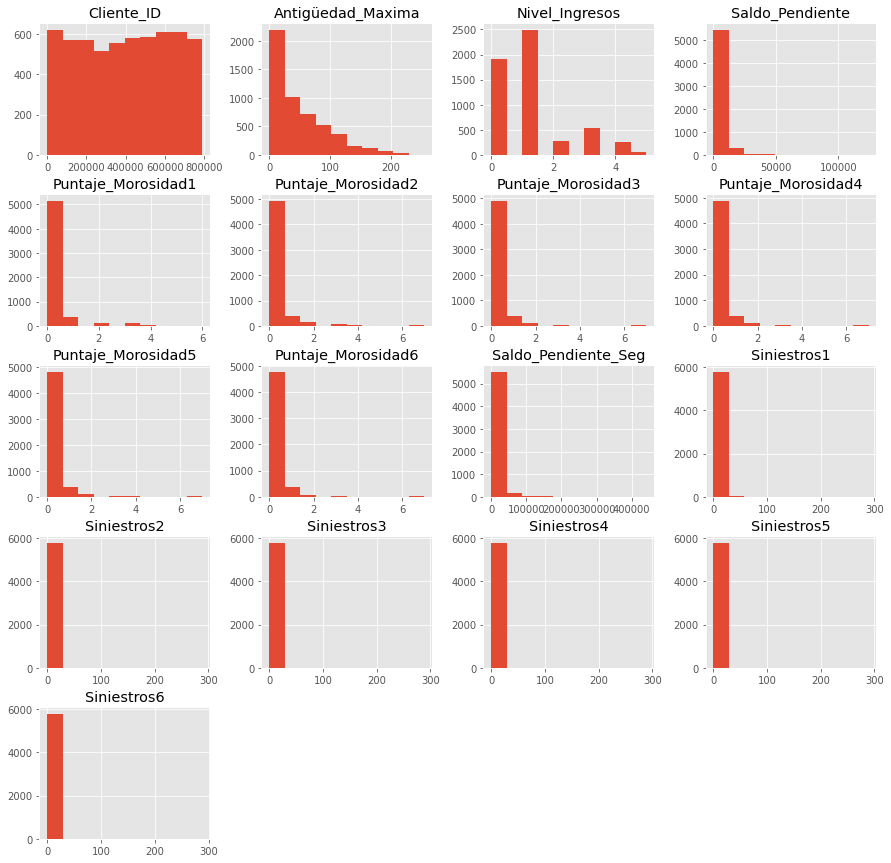

In [ ]:
# Generamos gráficos con datos perdidos
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
# En un primer momento revisamos la estructura de las variables y los datos perdidos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

In [ ]:
# Revisamos la cantidad de columnas y datos
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",df.shape[0])

La cantidad de columnas en los datos es:  18
La cantidad de filas en los datos es:  5800


In [ ]:
# Checamos las estadisticas basicas de los datos con datos perdidos 
df.describe().transpose() 
# En un primer momento podemos observar que el maximo puntaje de morosidad, de acuerdo con las instrucciones del problema es 6, por lo que 
# seria necesario ajustarlo a dicha categoria. En el caso de las variables siniestros, a mi consideración tiene datos aoutliers porque dentro de 
# las distribuciones maximas pasa de entre 40-69 el historial de siniestros del cliente a un maximo de 289 siniestros, lo cual se puede 
# deber a un error de dedo, lo cual para el caso de accidentes automovilisticos seria hasta cierto punto ilogico: de tanto accidentes
# el cliente probablemente ya habría fallecido en un posible choque. 

,count,mean,std,min,25%,50%,75%,max
Cliente_ID,5800.0,396733.357414,230285.889850,185.0,195501.2500,403865.000,598317.7500,790771.00
Antigüedad_Maxima,5213.0,49.847113,47.050525,0.0,12.0000,34.000,76.0000,255.00
Nivel_Ingresos,5527.0,1.071286,1.158293,0.0,0.0000,1.000,1.0000,5.00
Saldo_Pendiente,5800.0,3240.983681,6157.722805,0.0,329.7475,1100.315,3265.3225,124102.08
Puntaje_Morosidad1,5800.0,0.199310,0.679003,0.0,0.0000,0.000,0.0000,6.00
Puntaje_Morosidad2,5614.0,0.243498,0.891208,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad3,5544.0,0.220238,0.842461,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad4,5460.0,0.193590,0.781070,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad5,5397.0,0.185473,0.744306,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad6,5324.0,0.172239,0.707314,0.0,0.0000,0.000,0.0000,7.00


In [ ]:
# Separamos los datos numéricos de los cualitativos en un nuevo dataframe
df_num=pd.DataFrame(data=df, columns=['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6'])
cols_num = df_num.columns 
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5213 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   int64  
 4   Siniestros2          5800 non-null   int64  
 5   Siniestros3          5800 non-null   int64  
 6   Siniestros4          5800 non-null   int64  
 7   Siniestros5          5800 non-null   int64  
 8   Siniestros6          5800 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 407.9 KB


In [ ]:
# Verificamos los datos nulos 
df_num.isnull().sum() 

Antigüedad_Maxima      587
Saldo_Pendiente          0
Saldo_Pendiente_Seg      0
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
dtype: int64

In [ ]:
# Corregimos los datos outliers para los siniestros 
df_num.loc[df_num['Siniestros1'] == 289, 'Siniestros1'] = int(df_num['Siniestros1'].median())
df_num.loc[df_num['Siniestros2'] == 289, 'Siniestros2'] = int(df_num['Siniestros2'].median())
df_num.loc[df_num['Siniestros3'] == 289, 'Siniestros3'] = int(df_num['Siniestros3'].median())
df_num.loc[df_num['Siniestros4'] == 289, 'Siniestros4'] = int(df_num['Siniestros4'].median())
df_num.loc[df_num['Siniestros5'] == 289, 'Siniestros5'] = int(df_num['Siniestros5'].median())
df_num.loc[df_num['Siniestros6'] == 288, 'Siniestros6'] = int(df_num['Siniestros6'].median())
# Estos son los datos atipicos que de detectaron en los maximos y minimos del dataframe

In [ ]:
# Corregimos los datos de maxima antiguedad
# Primero corregimos los ceros porque no puede haber un tiempo cero de antiguedad 
df_num.loc[df_num['Antigüedad_Maxima'] == 0, 'Antigüedad_Maxima'] = int(df_num['Antigüedad_Maxima'].median())

In [ ]:
# Corregimos los datos nulos de la maxima antiguedad
# Generamos la mediana de la maxima antiguedad
media_ant_max=df_num['Antigüedad_Maxima'].median().round(1)
media_ant_max

34.0

In [ ]:
# Corregidos los ceros, llenamos los datos perdidos de maxima antiguedad 
df_num['Antigüedad_Maxima']=df_num['Antigüedad_Maxima'].fillna(media_ant_max)

In [ ]:
# Verificamos la estructura del dataframe
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   int64  
 4   Siniestros2          5800 non-null   int64  
 5   Siniestros3          5800 non-null   int64  
 6   Siniestros4          5800 non-null   int64  
 7   Siniestros5          5800 non-null   int64  
 8   Siniestros6          5800 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 407.9 KB


In [ ]:
# Convertimos los siniestros en float para estandarizar el tipo de dato (por buenas practicas)
df_num['Siniestros1'] = df_num['Siniestros1'].astype(float)
df_num['Siniestros2'] = df_num['Siniestros2'].astype(float)
df_num['Siniestros3'] = df_num['Siniestros3'].astype(float)
df_num['Siniestros4'] = df_num['Siniestros4'].astype(float)
df_num['Siniestros5'] = df_num['Siniestros5'].astype(float)
df_num['Siniestros6'] = df_num['Siniestros6'].astype(float)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
dtypes: float64(9)
memory usage: 407.9 KB


In [ ]:
# Checamos las estadisticas basicas numericas sin datos perdidos
df_num.describe().transpose() 
# Como podemos observar se corrigieron los datos outliers para las variables siniestros y la antiguedad maxima ya no tiene un valor minimo de
# cero que desde un punto de vista personal no puede ser posible. 

,count,mean,std,min,25%,50%,75%,max
Antigüedad_Maxima,5800.0,48.729828,44.518190,1.0,15.0000,34.000,68.0000,255.00
Saldo_Pendiente,5800.0,3240.983681,6157.722805,0.0,329.7475,1100.315,3265.3225,124102.08
Saldo_Pendiente_Seg,5800.0,4970.516469,22016.410538,0.0,0.0000,0.000,0.0000,442334.80
Siniestros1,5800.0,0.733966,3.096608,0.0,0.0000,0.000,0.0000,69.00
Siniestros2,5800.0,0.646207,2.862246,0.0,0.0000,0.000,0.0000,68.00
Siniestros3,5800.0,0.596034,2.718769,0.0,0.0000,0.000,0.0000,65.00
Siniestros4,5800.0,0.544483,2.567070,0.0,0.0000,0.000,0.0000,47.00
Siniestros5,5800.0,0.495862,2.400203,0.0,0.0000,0.000,0.0000,41.00
Siniestros6,5800.0,0.454828,2.262638,0.0,0.0000,0.000,0.0000,40.00


In [ ]:
# Generamos un dataframe de datos cualitativos 
df_cat=pd.DataFrame(data=df, columns=['Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6'])
cols_cat = df_cat.columns 
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nivel_Ingresos      5527 non-null   float64
 1   Puntaje_Morosidad1  5800 non-null   int64  
 2   Puntaje_Morosidad2  5614 non-null   float64
 3   Puntaje_Morosidad3  5544 non-null   float64
 4   Puntaje_Morosidad4  5460 non-null   float64
 5   Puntaje_Morosidad5  5397 non-null   float64
 6   Puntaje_Morosidad6  5324 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 317.3 KB


In [ ]:
# Verificamos los datos nulos 
df_cat.isnull().sum()

Nivel_Ingresos        273
Puntaje_Morosidad1      0
Puntaje_Morosidad2    186
Puntaje_Morosidad3    256
Puntaje_Morosidad4    340
Puntaje_Morosidad5    403
Puntaje_Morosidad6    476
dtype: int64

In [ ]:
# Reemplazamos la categoria 7 por 6 de acuerdo con las especificaciones del problema
df_cat['Puntaje_Morosidad2'] = df_cat['Puntaje_Morosidad2'].replace([7], [6])
df_cat['Puntaje_Morosidad3'] = df_cat['Puntaje_Morosidad3'].replace([7], [6])
df_cat['Puntaje_Morosidad4'] = df_cat['Puntaje_Morosidad4'].replace([7], [6])
df_cat['Puntaje_Morosidad5'] = df_cat['Puntaje_Morosidad5'].replace([7], [6])
df_cat['Puntaje_Morosidad6'] = df_cat['Puntaje_Morosidad6'].replace([7], [6])
# Los rangos del puntaje de morosidad se encuentra de 0 a 6, por lo que se realiza el ajuste pertinente

In [ ]:
# Checamos las variables caulitativas 
df_cat.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Nivel_Ingresos,5527.0,1.071286,1.158293,0.0,0.0,1.0,1.0,5.0
Puntaje_Morosidad1,5800.0,0.199310,0.679003,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad2,5614.0,0.233880,0.820840,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad3,5544.0,0.212302,0.781012,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad4,5460.0,0.186813,0.724250,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad5,5397.0,0.179544,0.692143,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad6,5324.0,0.166792,0.656746,0.0,0.0,0.0,0.0,6.0


In [ ]:
# Para las variables cualitativas podemos imputar con la moda directamente con SimpleImputer
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')  
df_cat1 = simple.fit_transform(df_cat)
df_cat1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Generamos un dataframe incluyendo el array de los datos imputados 
df_cat2 = pd.DataFrame(data=df_cat1, columns=['Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6'])
df_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nivel_Ingresos      5800 non-null   float64
 1   Puntaje_Morosidad1  5800 non-null   float64
 2   Puntaje_Morosidad2  5800 non-null   float64
 3   Puntaje_Morosidad3  5800 non-null   float64
 4   Puntaje_Morosidad4  5800 non-null   float64
 5   Puntaje_Morosidad5  5800 non-null   float64
 6   Puntaje_Morosidad6  5800 non-null   float64
dtypes: float64(7)
memory usage: 317.3 KB


In [ ]:
# Definimos el target en otro dataframe para su tratamiento especifico
df_target=pd.DataFrame(data=df, columns=['Estado_Siniestro'])
df_target

,Estado_Siniestro
0,no
1,no
2,no
3,no
4,no
...,...
5795,NaN
5796,NaN
5797,NaN
5798,NaN


In [ ]:
# Recodificamos el estado del siniestro 
def edo_siniestro(Estado_Siniestro):
  if Estado_Siniestro == 'no':
    return 0
  elif Estado_Siniestro == 'si':
    return 1
df_target['Estado_Siniestro']=df_target['Estado_Siniestro'].apply(lambda x: edo_siniestro(x))
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado_Siniestro  4732 non-null   float64
dtypes: float64(1)
memory usage: 45.4 KB


In [ ]:
# Generamos moda de estado siniestro
from statistics import mode
moda_edo_siniestro=mode(df_target['Estado_Siniestro'])
moda_edo_siniestro

0.0

In [ ]:
# Integramos la moda en estado siniestro
df_target['Estado_Siniestro']=df_target['Estado_Siniestro'].fillna(moda_edo_siniestro)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado_Siniestro  5800 non-null   float64
dtypes: float64(1)
memory usage: 45.4 KB


In [ ]:
# Agrupamos el estado siniestro
df_target.groupby('Estado_Siniestro').size().sort_values()

Estado_Siniestro
1.0     496
0.0    5304
dtype: int64

In [ ]:
# Unimos los dataframe cualitativos
df_cual = pd.merge(df_cat2, df_target, left_index=True, right_index=True)
df_cual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nivel_Ingresos      5800 non-null   float64
 1   Puntaje_Morosidad1  5800 non-null   float64
 2   Puntaje_Morosidad2  5800 non-null   float64
 3   Puntaje_Morosidad3  5800 non-null   float64
 4   Puntaje_Morosidad4  5800 non-null   float64
 5   Puntaje_Morosidad5  5800 non-null   float64
 6   Puntaje_Morosidad6  5800 non-null   float64
 7   Estado_Siniestro    5800 non-null   float64
dtypes: float64(8)
memory usage: 362.6 KB


In [ ]:
df_cual = df_cual.astype(object)
df_cual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nivel_Ingresos      5800 non-null   object
 1   Puntaje_Morosidad1  5800 non-null   object
 2   Puntaje_Morosidad2  5800 non-null   object
 3   Puntaje_Morosidad3  5800 non-null   object
 4   Puntaje_Morosidad4  5800 non-null   object
 5   Puntaje_Morosidad5  5800 non-null   object
 6   Puntaje_Morosidad6  5800 non-null   object
 7   Estado_Siniestro    5800 non-null   object
dtypes: object(8)
memory usage: 362.6+ KB


In [ ]:
# Unimos los dataframe numerico y cualitativo sin datos perdidos 
df2 = pd.merge(df_num, df_cual, left_index=True, right_index=True)
df2.info()
# Este no sería el dataframe final pero las variables ya estan imputadas. El estado de siniestro fue imputado con la moda de forma especifica,
# mientras que las demas variables cualitativas con SimpleImputer, en algunos casos es posible observar que apesar que los clientes cuentan 
# con cierto numero de siniestros en su historial, es posible identificar que estado de siniestro se encuentra en cero, es decir, 
# no hay siniestro, por lo que dada esa estructura se hace la imputación mediante la moda. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
 9   Nivel_Ingresos       5800 non-null   object 
 10  Puntaje_Morosidad1   5800 non-null   object 
 11  Puntaje_Morosidad2   5800 non-null   object 
 12  Puntaje_Morosidad3   5800 non-null   object 
 13  Puntaje_Morosidad4   5800 non-null   object 
 14  Puntaje_Morosidad5   5800 non-null   object 
 15  Puntaje_Morosidad6   5800 non-null   o

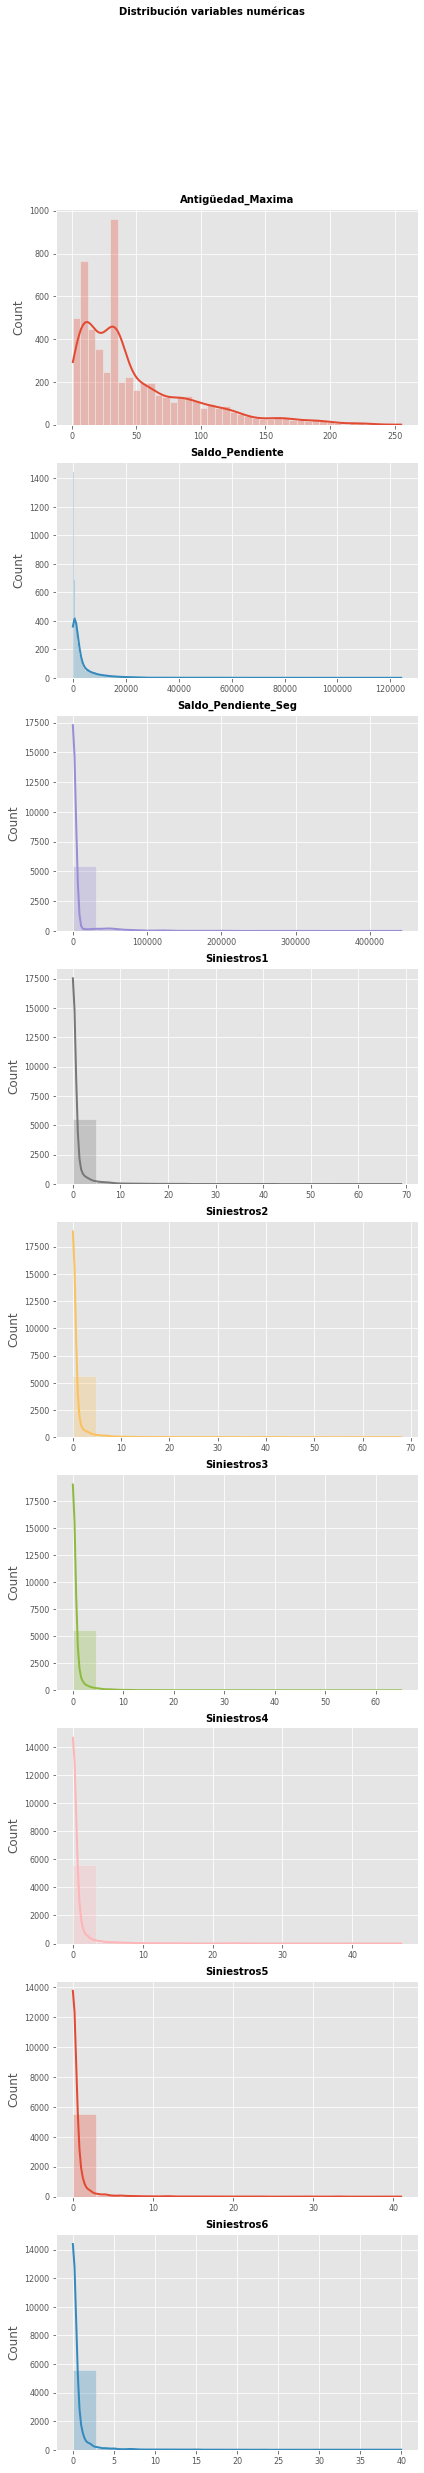

In [ ]:
# Gráfico de distribución para las  variable numéricas
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(6, 35))
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['float64']).columns
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");
# Como podemos observar las variable numericas corregidas en cuanto a datos outliers y datos perdidos 
# Los saldos pendientes e historial de siniestros presentan una distribución similar, la mayoria de historial de siniestros se concentra en
# un rango menor a 10. 
# En cuanto a la maxima antiguedad no presenta una distribucion normal, y la mayoria de clientes se concentra en el rango de los 50 meses. 

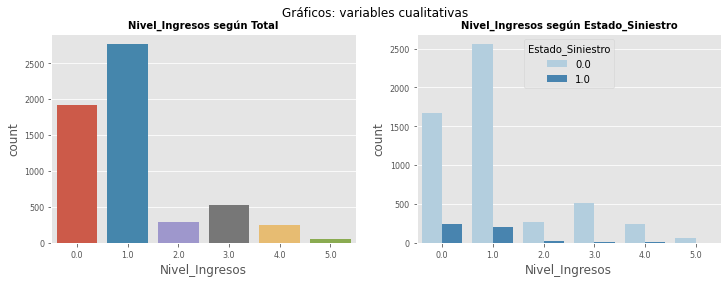

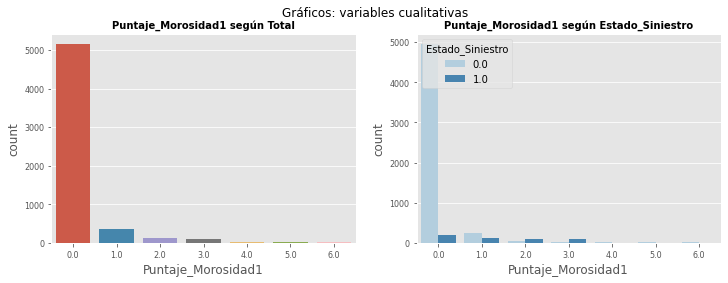

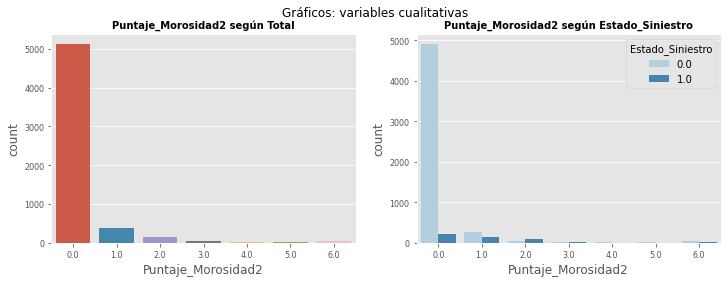

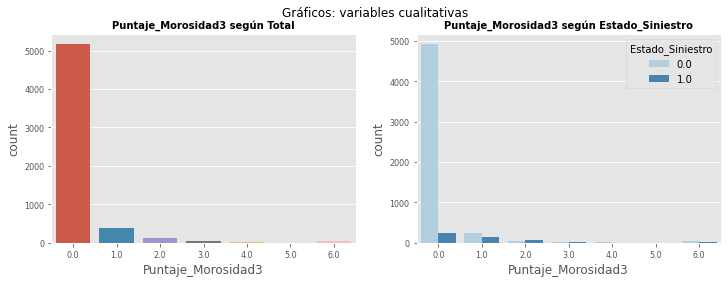

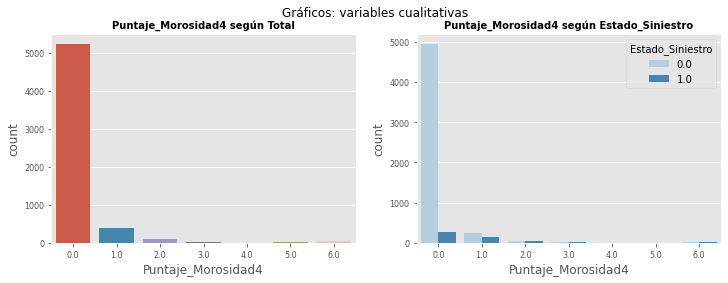

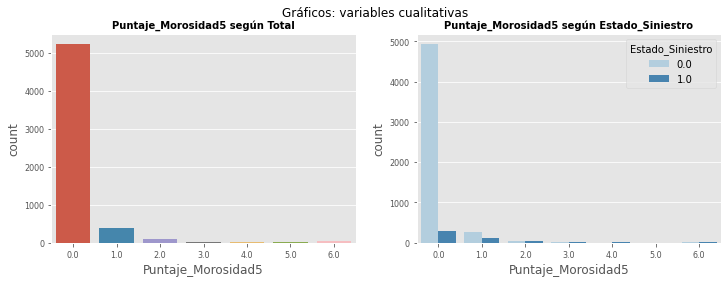

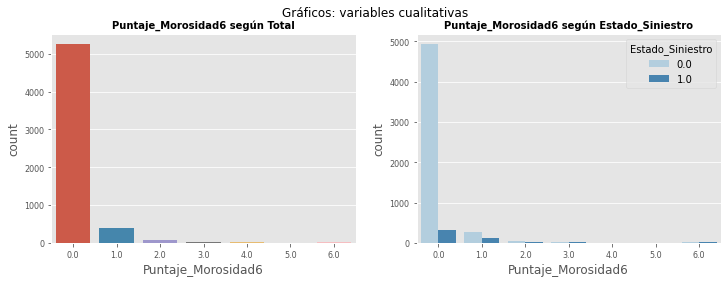

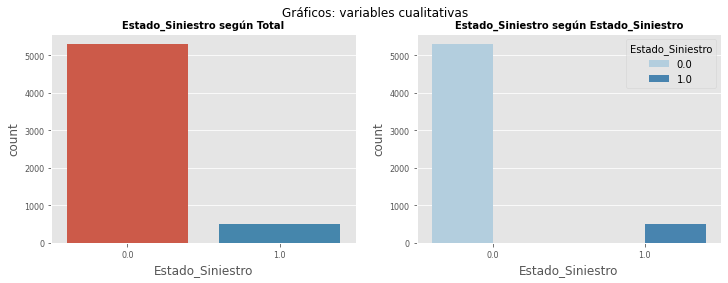

In [ ]:
# Graficando las variables cualitativas
cols_cual = df2.select_dtypes(include=['object']).columns
for i, colum in enumerate(cols_cual): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')
    sns.countplot(x=colum, data=df2, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)
    sns.countplot(x=colum, hue="Estado_Siniestro", data=df2, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Estado_Siniestro", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)
    # El nivel de ingresos y los puntajes de morosidad respecto a la propensión a siniestros ya ajustados a las categorias indicadas en el 
    # documento PDF, muestran una distribución diferente a las graficas iniciales. Los menores niveles de ingresos no estan propensos a sufrir
    # siniestros, y los menores puntajes de morosidad tienen una mayor propensión a no sufrir accidentes. 

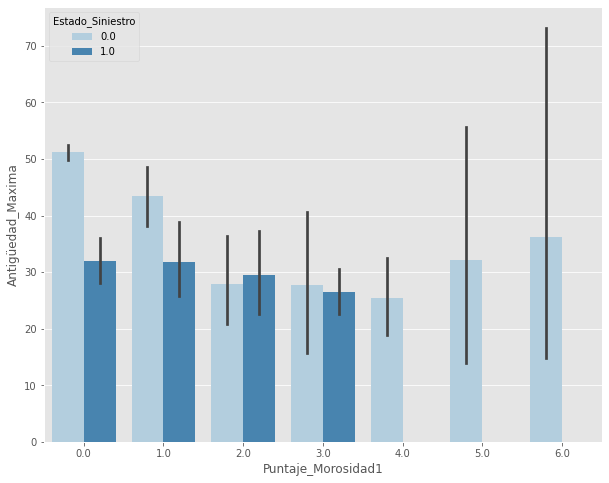

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Puntaje_Morosidad1', y = 'Antigüedad_Maxima', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los clientes propensos a sufrir siniestros presentan menos puntaje de morosidad, los clientes de hasta 50 meses de antiguedad presentan
# menos morosidad, pero tambien los clientes de casi 40 meses de antiguedad presentan los puntajes maximos de morosidad (5 y 6).

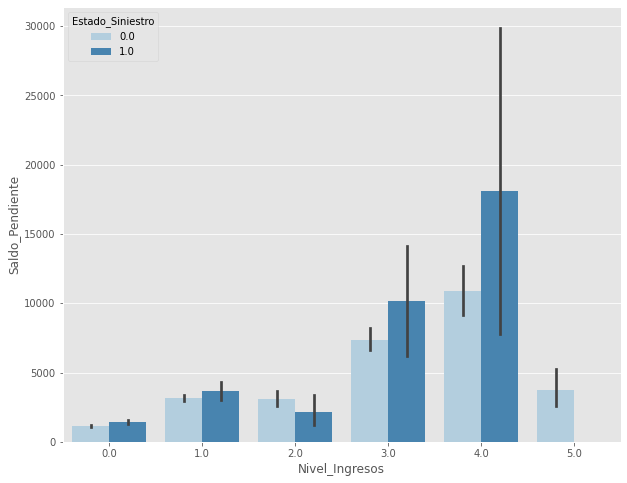

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Nivel_Ingresos', y = 'Saldo_Pendiente', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los estratos de mayores ingresos y que estan propensos a sufrir un siniestro son los que presentan mayor saldo pendiente. 

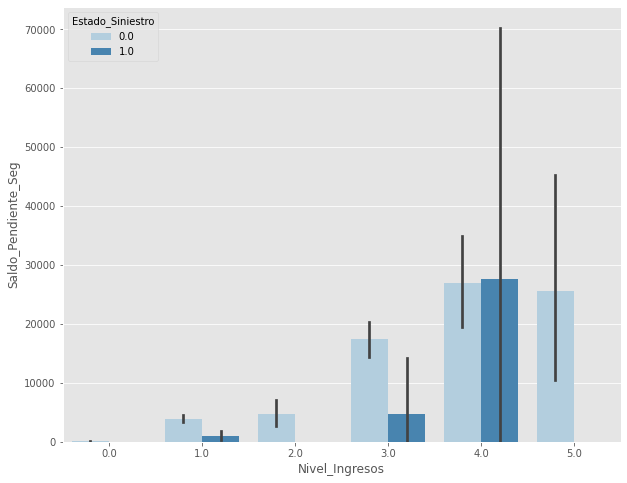

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Nivel_Ingresos', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data=df2, palette='Blues')
# Igualmente, los estratos de mayores ingresos que puede ser propensos a siniestros o no, presentan los mayores saldos pendientes de la 
# poliza del seguro. 

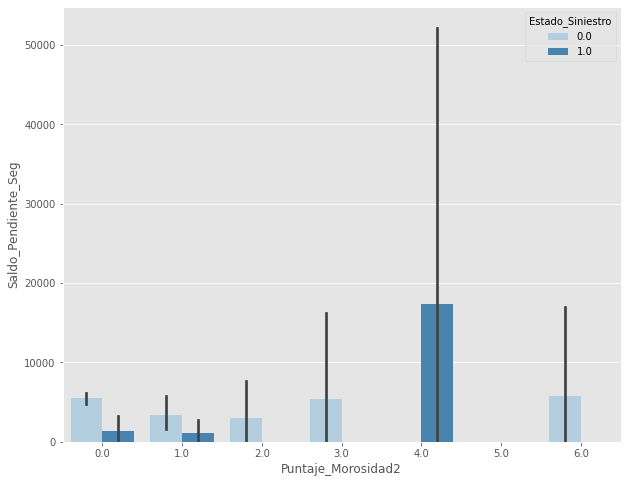

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Puntaje_Morosidad2', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los clientes con mayores puntajes de morosidad que estan propensos a un siniestro tiene mayores saldos pendientes de la poliza. 

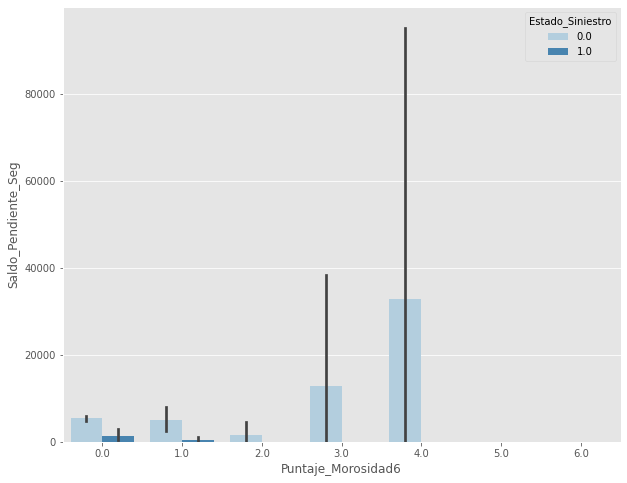

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Puntaje_Morosidad6', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los clientes con mayor morosidad6 y que no estan propensos a sufrir un siniestro tambien presentan saldos pendientes de la poliza
# altos. 

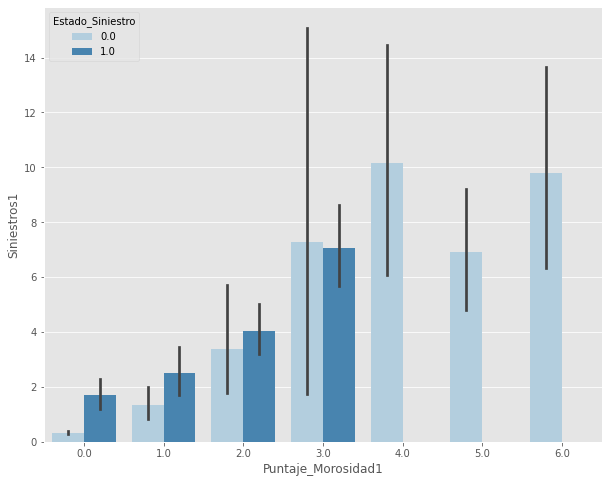

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Puntaje_Morosidad1', y = 'Siniestros1', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los clientes con menor morosidad y mayor propensión a siniestros presentan menor historial de siniestros. 

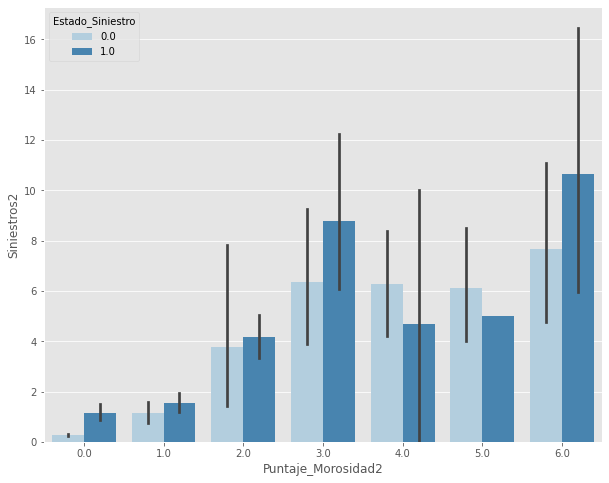

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Puntaje_Morosidad2', y = 'Siniestros2', hue='Estado_Siniestro', data=df2, palette='Blues')
# Los clientes con mayor morosidad2 y con propension a siniestros presentan mayor historial de siniestros2.

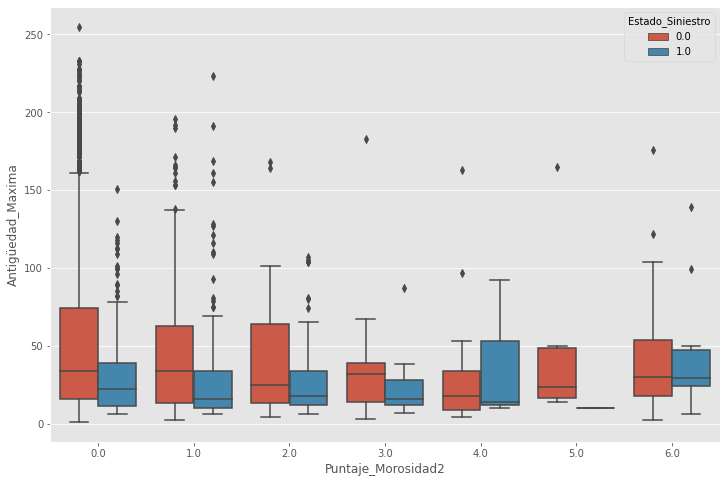

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Puntaje_Morosidad2', y = 'Antigüedad_Maxima', hue='Estado_Siniestro', data = df2);
# La antiguedad maxima de los clientes presenta datos outliers tanto pero se concentran mas en los menores niveles de morosidad tanto para 
# los clientes con propension a siniestros como aquellos que no tienen esa propensión. 

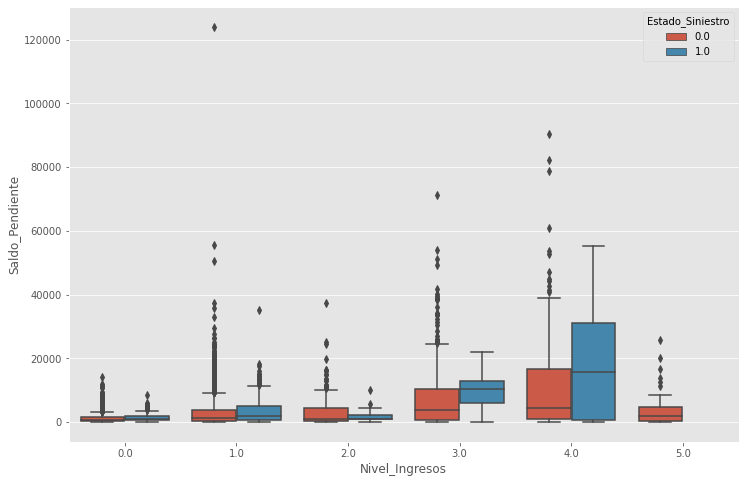

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Nivel_Ingresos', y = 'Saldo_Pendiente', hue='Estado_Siniestro', data = df2);
# En el caso del saldo pendiente respecto al nivel de ingresos de los clientes, la mayoria de outliers se presenta en los estratos 
# 1 y 4 de ingresos. 

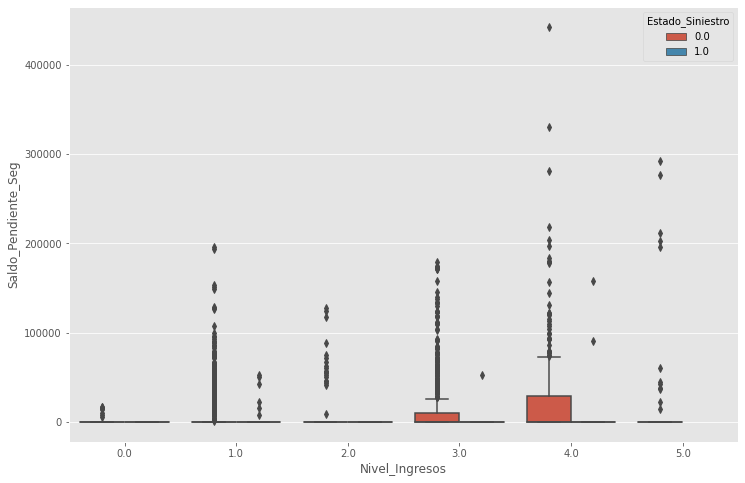

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Nivel_Ingresos', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data = df2);
# La mayoria de outliers se encuentran fuera de los saldos pendientes de la poliza. 

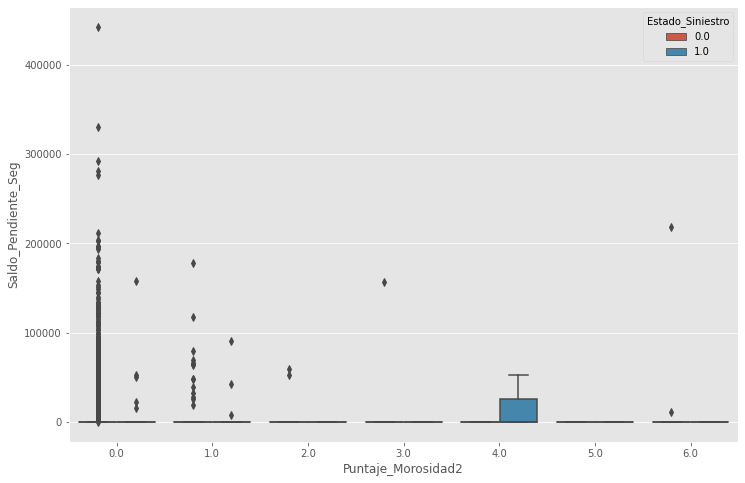

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Puntaje_Morosidad2', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data = df2);
# La mayoria de outliers de los puntajes de morosidad mas bajos se encuentran fuera de los saldos pendientes de la poliza.

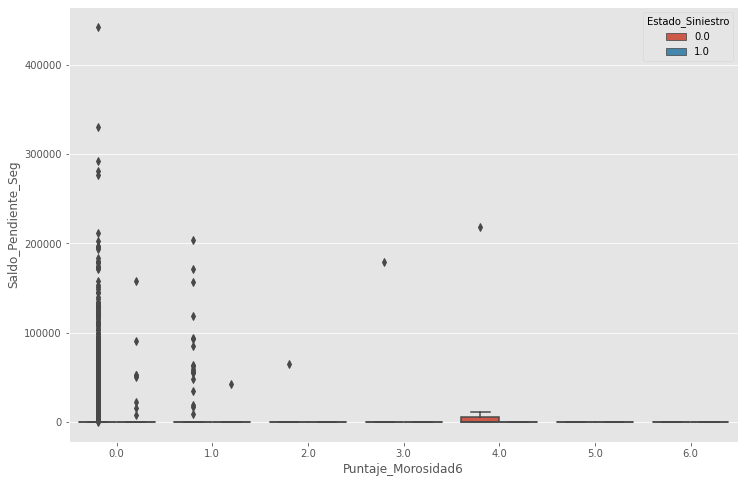

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Puntaje_Morosidad6', y = 'Saldo_Pendiente_Seg', hue='Estado_Siniestro', data = df2);
# La mayoria de outliers de los puntajes de morosidad mas bajos se encuentran fuera de los saldos pendientes de la poliza.

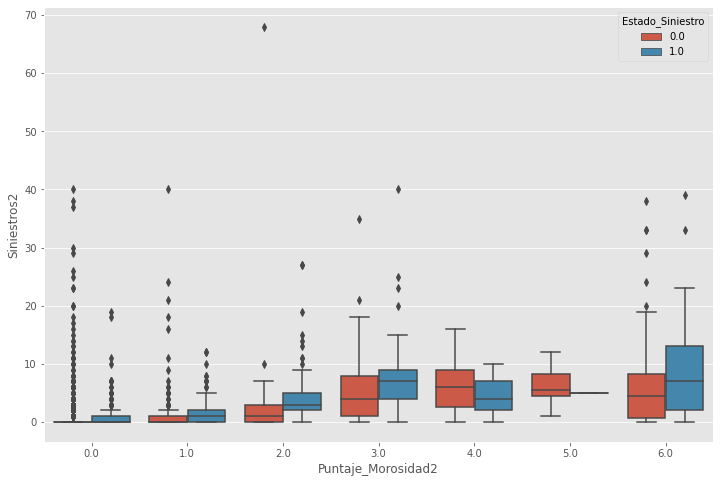

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Puntaje_Morosidad2', y = 'Siniestros2', hue='Estado_Siniestro', data = df2);
# Los puntajes de morosidad más bajos presentan tambien la mayoria de outliers concentrados para el caso del historial de siniestros. 

In [ ]:
# Definimos la media y la varianza
var_num = df2.select_dtypes(include=['float64']).columns
def mean_var(x: float):
  return np.mean(x), np.var(x)
d= df2[var_num].apply(mean_var, axis=0).T.round(2)
d.columns = ["Media", "Varianza"]
d

,Media,Varianza
Antigüedad_Maxima,48.73,1.981530e+03
Saldo_Pendiente,3240.98,3.791101e+07
Saldo_Pendiente_Seg,4970.52,4.846388e+08
Siniestros1,0.73,9.590000e+00
Siniestros2,0.65,8.190000e+00
Siniestros3,0.60,7.390000e+00
Siniestros4,0.54,6.590000e+00
Siniestros5,0.50,5.760000e+00
Siniestros6,0.45,5.120000e+00


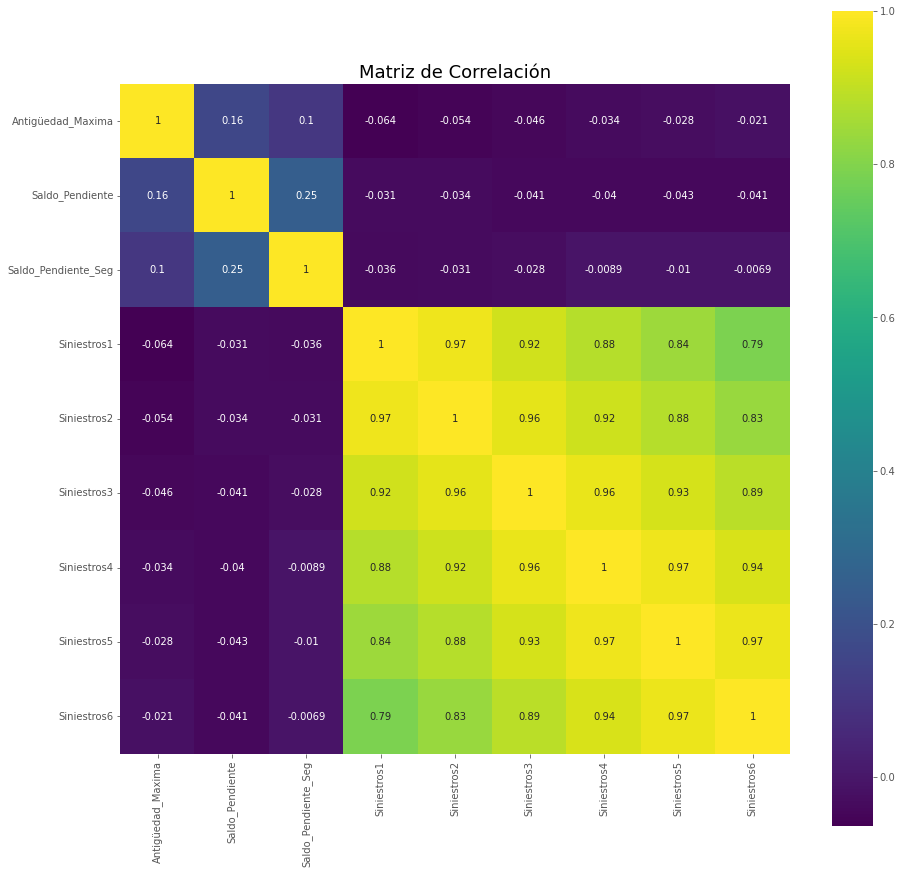

In [ ]:
# Graficamos el mapa de calor de correlaciones de las variables numericas y cualitativas
correlacion=df2[var_num].corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlacion, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Matriz de Correlación', fontsize=18)
plt.show()

## Análisis de componentes principales y segmentación con cluster

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# Importamos las librerias del preprocesado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df2[var_num])
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_  # matriz i * j

array([[-2.30976176e-02, -2.21506308e-02, -1.25965876e-02,
         3.97536172e-01,  4.08610207e-01,  4.16099385e-01,
         4.16661713e-01,  4.10990582e-01,  3.97694514e-01],
       [ 4.71577538e-01,  6.42613804e-01,  6.02329035e-01,
        -3.68616924e-03,  3.61574900e-03,  7.12425968e-03,
         2.24566013e-02,  2.33907833e-02,  2.70742112e-02],
       [-8.58069045e-01,  1.83159824e-01,  4.78439589e-01,
         1.85625588e-02,  8.24792124e-03, -3.67155038e-03,
        -7.52796122e-03, -1.69660590e-02, -2.22476759e-02],
       [-1.93849547e-01,  7.42345455e-01, -6.36994415e-01,
         4.61802666e-02,  3.27116633e-02,  1.07348241e-02,
        -1.71131856e-02, -2.69608832e-02, -3.52992548e-02],
       [ 5.65049564e-02, -4.37811118e-02,  4.78949928e-02,
         5.66855340e-01,  4.28487100e-01,  1.12463671e-01,
        -1.73931722e-01, -3.77651810e-01, -5.49680900e-01],
       [-3.26264695e-03,  3.87088416e-03, -2.45726294e-03,
        -4.36233191e-01, -8.80892278e-02,  5.938933

In [ ]:
# Añadimos el array a un dataframe para generar el nombre de los componentes
componentes = pd.DataFrame(data = modelo_pca.components_, columns = df2[var_num].columns, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
componentes = componentes.transpose().round(3)
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Antigüedad_Maxima,-0.023,0.472,-0.858,-0.194,0.057,-0.003,0.001,-0.004,-0.001
Saldo_Pendiente,-0.022,0.643,0.183,0.742,-0.044,0.004,0.000,0.000,-0.001
Saldo_Pendiente_Seg,-0.013,0.602,0.478,-0.637,0.048,-0.002,-0.007,-0.001,-0.006
Siniestros1,0.398,-0.004,0.019,0.046,0.567,-0.436,0.281,-0.479,-0.140
Siniestros2,0.409,0.004,0.008,0.033,0.428,-0.088,-0.223,0.725,0.257
Siniestros3,0.416,0.007,-0.004,0.011,0.112,0.594,-0.523,-0.271,-0.338
Siniestros4,0.417,0.022,-0.008,-0.017,-0.174,0.422,0.455,-0.160,0.621
Siniestros5,0.411,0.023,-0.017,-0.027,-0.378,-0.015,0.444,0.343,-0.610
Siniestros6,0.398,0.027,-0.022,-0.035,-0.550,-0.521,-0.440,-0.170,0.209


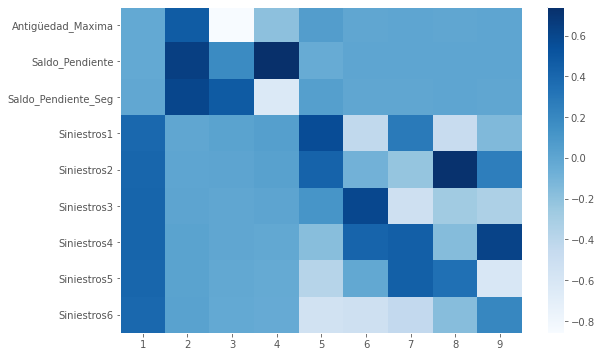

In [ ]:
# Heatmap de los 9 componentes numericos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto')   # cmap= "viridis" "#69d" 
plt.yticks(range(len(df2[var_num].columns)), df2[var_num].columns)
plt.xticks(range(len(df2[var_num].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();
# No existe mucha variedad en las correlaciones, los componentes 2, 3 y 4 deberian retirarse. 

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.61821701 0.14986717 0.10083294 0.08251202 0.03469793 0.00675307
 0.00317202 0.00207919 0.00186867]


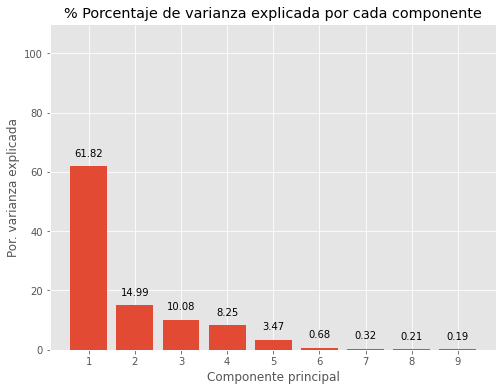

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_*100
)

for x, y in zip(np.arange(len(df2[var_num].columns)) + 1, modelo_pca.explained_variance_ratio_*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1*100)
ax.set_title('% Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
# Si nos quedaramos con aquellos que al menos explican el 5% de la varianza para el caso de las numericas el corte se haría hasta el componente
# principal 4, el resto de los componentes se retiraria. Obviamente en una segunda etapa de iteración podrian quitarse 2, 3 y 4. 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.61821701 0.76808417 0.86891711 0.95142912 0.98612705 0.99288013
 0.99605215 0.99813133 1.        ]


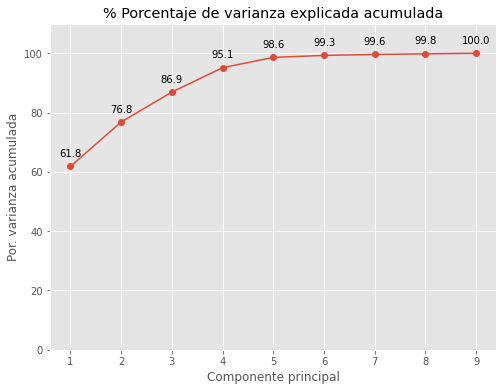

In [ ]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(
    np.arange(len(df2[var_num].columns)) + 1,
    prop_varianza_acum*100,
    marker = 'o'
)

for x, y in zip(np.arange(len(df2[var_num].columns)) + 1, prop_varianza_acum*100):
    label = round(y, 1)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1*100)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
# Con esos 4 componentes estariamos perdiendo aproximadamente un 5% de varianza explicada del total de variables numericas consideradas

In [ ]:
# Tratamiento de datos
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)

In [ ]:
# Checamos las variables numericas
df2[var_num]

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,44.0,604.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79.0,1006.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102.0,299.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.0,645.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.0,218.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5795,13.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5796,2.0,2196.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5797,4.0,805.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5798,34.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Estandarización de las variables
datos_scaled = scale(X=df2[var_num], axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=df2[var_num].columns, index=df2[var_num].index)
datos_scaled
# Realizamos el escalado para quitar el peso que generan las variables numericas consideradas 

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,-0.106254,-0.428137,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
1,0.680009,-0.362953,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
2,1.196697,-0.477775,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
3,-0.330901,-0.421587,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
4,1.353949,-0.490968,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
...,...,...,...,...,...,...,...,...,...
5795,-0.802659,-0.526374,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
5796,-1.049770,-0.169565,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
5797,-1.004841,-0.395515,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034
5798,-0.330901,-0.526372,-0.225784,-0.237043,-0.225789,-0.219248,-0.212121,-0.20661,-0.201034


In [ ]:
# Cálculo de distancias
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )
# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan
distancias = pd.DataFrame(distancias, columns=datos_scaled.index, index = datos_scaled.index)
distancias
# Cabe recordar que entre mas grande sea el valor, mayor sera la distancia entre los elementos

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,5790,5791,5792,5793,5794,5795,5796,5797,5798,5799
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.788961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.303896,0.529292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.224742,1.012609,1.528630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.461554,0.685990,0.157805,1.686278,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,0.703299,1.491647,1.999946,0.483255,2.156898,3.818993,3.617267,1.589021,2.780488,3.562738,...,0.270550,5.500633,6.121122,1.274036,0.234917,NaN,NaN,NaN,NaN,NaN
5796,0.978306,1.740556,2.267511,0.761767,2.425111,4.081583,3.825007,1.840579,3.010629,3.796845,...,0.334630,5.447898,5.984331,1.202952,0.216290,0.434024,NaN,NaN,NaN,NaN
5797,0.899179,1.685164,2.203073,0.674444,2.360720,4.023250,3.799667,1.773717,2.970742,3.755769,...,0.127238,5.489935,6.067095,1.221628,0.030364,0.240835,0.230374,NaN,NaN,NaN
5798,0.245186,1.024033,1.528370,0.104785,1.685222,3.347235,3.152309,1.188364,2.312269,3.093012,...,0.741689,5.480366,6.153068,1.441831,0.668810,0.471758,0.802549,0.686526,NaN,NaN


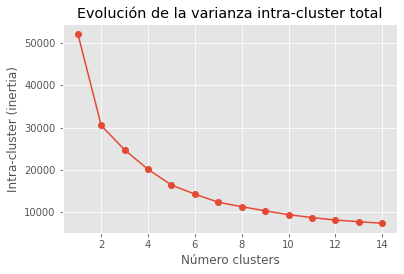

In [ ]:
# Generamos el grafico de Elbow para el numero optimo de clusters
range_n_clusters = range(1, 15)
inertias = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');
# Respecto al numero optimo de clusteres está entre 4 y 5 clusters ya que despues del 4 o 5 la varianza es constante

In [ ]:
# Importamos librerias kneed
#!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Estimamos el numero optimo de clusters a utilizar 
from kneed import KneeLocator 
kneedle=KneeLocator(range(1,15), inertias, curve='convex', direction='decreasing')
elbow_point=kneedle.elbow
elbow_point

5

In [ ]:
# Generamos los clusters (entrenamiento)
kmeans = KMeans(n_clusters=5).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.48421647e+00  7.75269041e-02 -1.14865149e-01 -1.88048631e-01
  -1.80355048e-01 -1.73125410e-01 -1.62970965e-01 -1.57912320e-01
  -1.53823285e-01]
 [-9.87333269e-03 -2.86246344e-01  9.44505973e-02  9.58724733e+00
   1.00084302e+01  1.03533341e+01  1.07338988e+01  1.07745896e+01
   1.05638062e+01]
 [-4.86539965e-01 -1.51559825e-01 -1.71312235e-01 -1.17645799e-01
  -1.24467779e-01 -1.28830396e-01 -1.30685621e-01 -1.27121888e-01
  -1.22494814e-01]
 [-2.69888654e-01 -1.48152623e-01 -1.54796539e-01  2.69346867e+00
   2.68659102e+00  2.65872212e+00  2.55258863e+00  2.42123531e+00
   2.29023920e+00]
 [ 4.08268033e-01  2.20443434e+00  3.48144245e+00 -2.07211024e-01
  -1.83691538e-01 -1.73452426e-01 -1.68312609e-01 -1.64775438e-01
  -1.42455497e-01]]


In [ ]:
# Generamos los clusters a los que pertenecen los clientes
segmento = kmeans.fit_predict(datos_scaled)
segmento

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

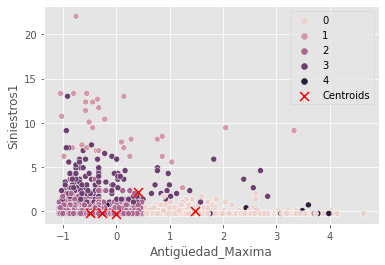

In [ ]:
# Graficamos los clusters
sns.scatterplot(data=datos_scaled, x='Antigüedad_Maxima', y='Siniestros1', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="r", s=80, label="Centroids")
plt.legend()
plt.show()

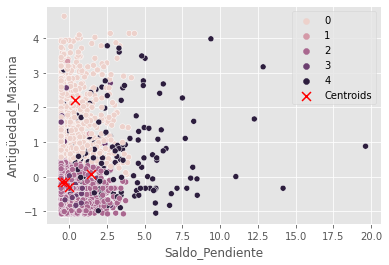

In [ ]:
# Graficamos los clusters
sns.scatterplot(data=datos_scaled, x='Saldo_Pendiente', y='Antigüedad_Maxima', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="r", s=80, label="Centroids")
plt.legend()
plt.show()

In [ ]:
# Incluimos la variable cluster en nuestro dataframe como variable cualitativa 
df2['Segmento'] = segmento
df2['Segmento'].replace({0: "Segmento 0", 1: "Segmento 1", 2: "Segmento 2", 3: "Segmento 3", 4: "Segmento 4"}, inplace=True)
df2

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Estado_Siniestro,Segmento
0,44.0,604.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2
1,79.0,1006.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 0
2,102.0,299.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 0
3,34.0,645.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2
4,109.0,218.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,13.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2
5796,2.0,2196.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2
5797,4.0,805.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2
5798,34.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Segmento 2


In [ ]:
# Verificamos la información con la variable cluster
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
 9   Nivel_Ingresos       5800 non-null   object 
 10  Puntaje_Morosidad1   5800 non-null   object 
 11  Puntaje_Morosidad2   5800 non-null   object 
 12  Puntaje_Morosidad3   5800 non-null   object 
 13  Puntaje_Morosidad4   5800 non-null   object 
 14  Puntaje_Morosidad5   5800 non-null   object 
 15  Puntaje_Morosidad6   5800 non-null   o

In [ ]:
#Realizamos un perfilado de las variables numericas por cada segmento
columns=['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6', 'Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Estado_Siniestro']
df2.groupby(['Segmento'])[columns].mean().round(2).T

Segmento,Segmento 0,Segmento 1,Segmento 2,Segmento 3,Segmento 4
Antigüedad_Maxima,114.64,48.29,27.02,36.72,67.20
Saldo_Pendiente,3704.11,1478.51,2309.81,2328.78,16944.78
Saldo_Pendiente_Seg,2432.40,7049.80,1231.59,1562.75,81756.50
Siniestros1,0.15,30.42,0.37,9.07,0.09
Siniestros2,0.13,29.29,0.29,8.34,0.12
Siniestros3,0.12,28.74,0.25,7.82,0.13
Siniestros4,0.13,28.10,0.21,7.10,0.11
Siniestros5,0.12,26.35,0.19,6.31,0.10
Siniestros6,0.11,24.35,0.18,5.64,0.13


In [ ]:
# Tabla de frecuencia de los segmentos
cluster_count = (df2.groupby("Segmento").agg(frequency=("Segmento", "count")))
cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count
# El numero de elementos por cada segmento no es constante, es decir, se encuentran desbalanceados por lo que se requeriria de una segunda etapa

,frequency,Acumulado
Segmento,,
Segmento 0,1297,1297
Segmento 1,31,1328
Segmento 2,4049,5377
Segmento 3,176,5553
Segmento 4,247,5800


In [ ]:
# Analizamos las numericas
import seaborn as sns
def graficar_nums(Segmento, var_num, data):
  fig, ax = plt.subplots(figsize=(6, 3.84))
  sns.boxplot(
          x     = Segmento,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )
  ax.set_title(f'{var_num} por Segmento');

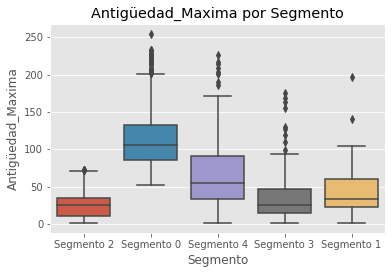

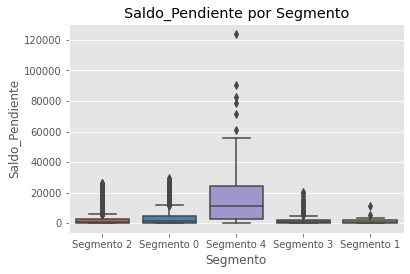

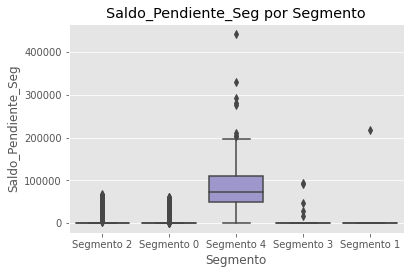

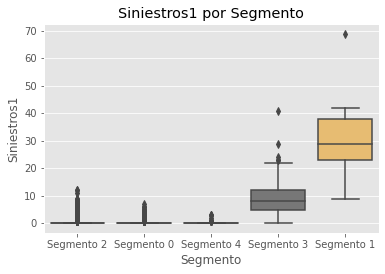

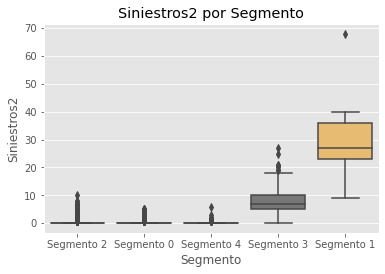

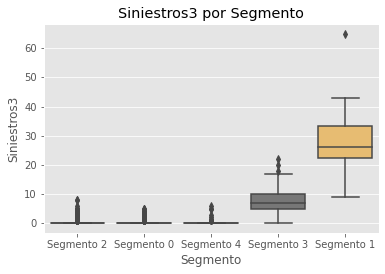

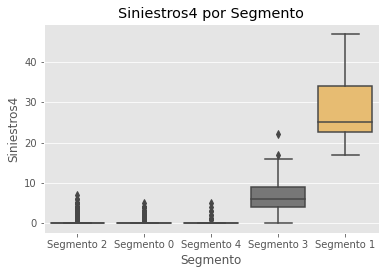

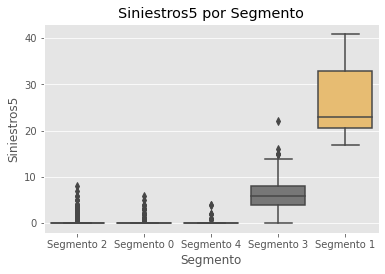

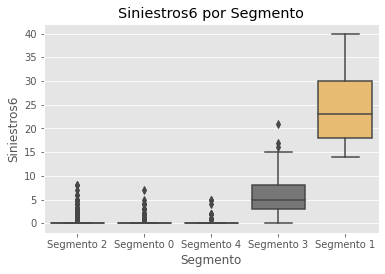

In [ ]:
Segmento = 'Segmento'
for i in cols_num: 
  graficar_nums(Segmento, i, df2)
# Podemos observar que sí hay ciertas diferencias en al menos dos segmentos respecto a las variables numericas pero existen datos outliers

In [ ]:
# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Siniestros6 ~ Segmento', data =df2).fit()
anova = sm.stats.anova_lm(mod, typ=2)
print(anova)
# Al menos hay un par de grupos distintos bajo esta variable numerica 

                sum_sq      df            F  PR(>F)
Segmento  22926.464415     4.0  4912.183814     0.0
Residual   6761.700412  5795.0          NaN     NaN


In [ ]:
#!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=64efbf869137a634673709bca05ff2551ff364d3a0b4536c280a2659480b47b6
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=196c647f5d78d74561452ea6392fea2cf6b6bf74b494f8de9af7b59d3e044691
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit adjustText


In [ ]:
# prueba Tukey cada par de grupos.
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df2, res_var='Siniestros6', xfac_var='Segmento', anova_model='Siniestros6 ~ Segmento')
res.tukey_summary
# El historial de siniestros, la mayoria son estadisticamente diferentes entre dos segmentos

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Segmento 2,Segmento 0,0.071422,-0.022618,0.165463,2.930738,0.232303
1,Segmento 2,Segmento 4,0.044218,-0.148958,0.237394,0.883298,0.900000
2,Segmento 2,Segmento 3,5.458542,5.231594,5.685490,92.812672,0.001000
3,Segmento 2,Segmento 1,24.177017,23.645620,24.708414,175.566287,0.001000
4,Segmento 0,Segmento 4,0.027204,-0.177416,0.231824,0.513026,0.900000
5,Segmento 0,Segmento 3,5.529964,5.293199,5.766730,90.128269,0.001000
6,Segmento 0,Segmento 1,24.248439,23.712776,24.784102,174.682478,0.001000
7,Segmento 4,Segmento 3,5.502760,5.212018,5.793503,73.034656,0.001000
8,Segmento 4,Segmento 1,24.221235,23.659623,24.782848,166.424390,0.001000
9,Segmento 3,Segmento 1,18.718475,18.144370,19.292580,125.816103,0.001000


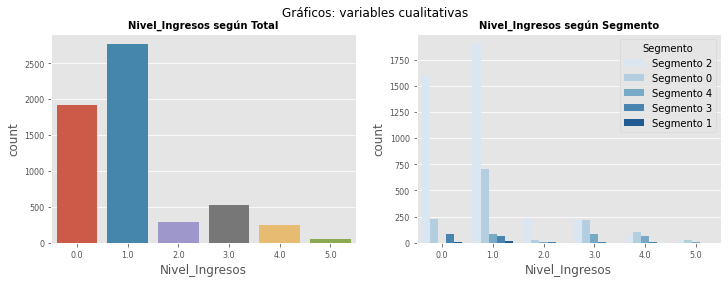

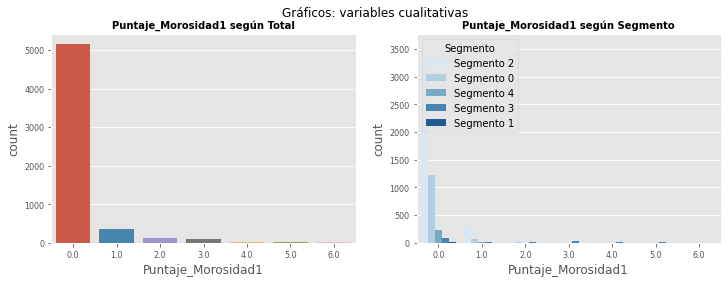

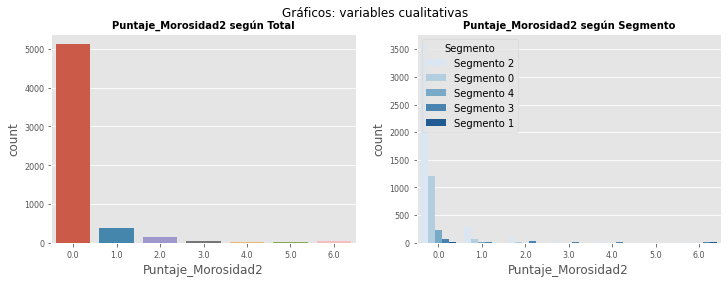

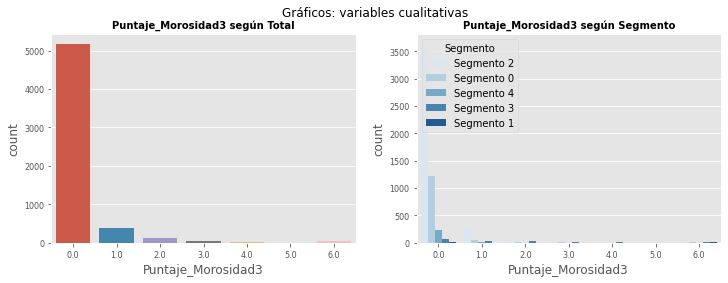

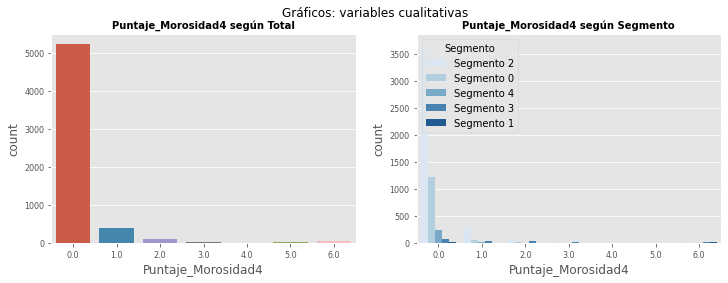

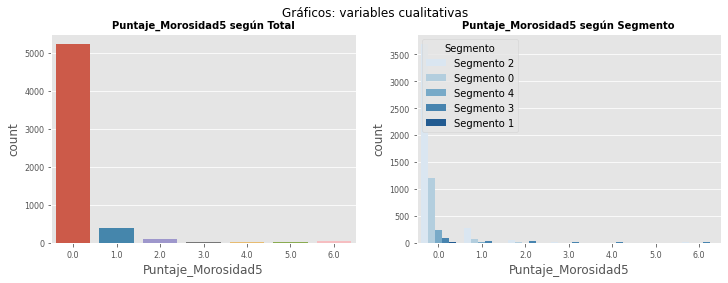

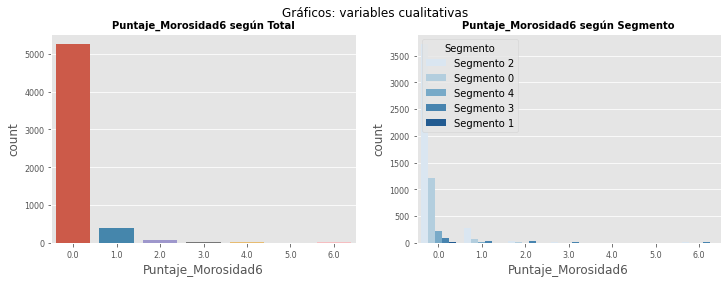

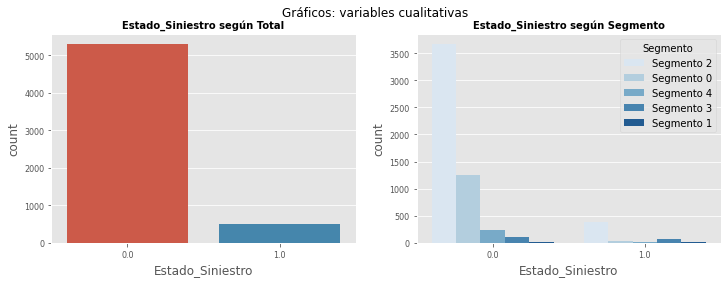

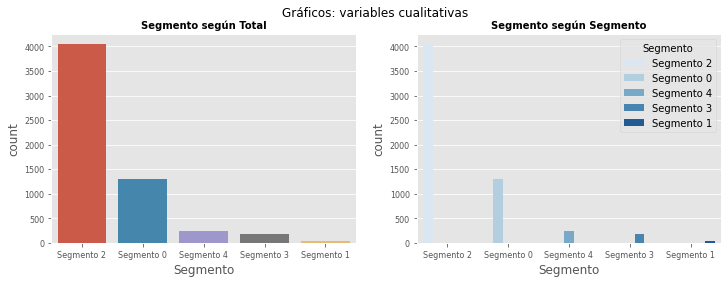

In [ ]:
# Graficando las variables cualitativas
cols_cual = df2.select_dtypes(include=['object']).columns
for i, colum in enumerate(cols_cual): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')
    sns.countplot(x=colum, data=df2, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)
    sns.countplot(x=colum, hue="Segmento", data=df2, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Segmento", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)
# El segmento 2 concentra los mayores estratos de ingresos
# En el segmento 2 se encuentran los menores puntajes de morosidad 
# El segmento 2 concentra la mayor parte de clientes que no son propensos a sufrir siniestros 

In [ ]:
# Regresion logistica: (Variable dependiente: Estado Siniestro)
# Generamos una copia del dataframe2 
df3=df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
 9   Nivel_Ingresos       5800 non-null   object 
 10  Puntaje_Morosidad1   5800 non-null   object 
 11  Puntaje_Morosidad2   5800 non-null   object 
 12  Puntaje_Morosidad3   5800 non-null   object 
 13  Puntaje_Morosidad4   5800 non-null   object 
 14  Puntaje_Morosidad5   5800 non-null   object 
 15  Puntaje_Morosidad6   5800 non-null   o

In [ ]:
# Cambiamos el tipo de variable a entero
df3['Nivel_Ingresos'] = df3['Nivel_Ingresos'].astype(int)
df3['Puntaje_Morosidad1'] = df3['Puntaje_Morosidad1'].astype(int)
df3['Puntaje_Morosidad2'] = df3['Puntaje_Morosidad2'].astype(int)
df3['Puntaje_Morosidad3'] = df3['Puntaje_Morosidad3'].astype(int)
df3['Puntaje_Morosidad4'] = df3['Puntaje_Morosidad4'].astype(int)
df3['Puntaje_Morosidad5'] = df3['Puntaje_Morosidad5'].astype(int)
df3['Puntaje_Morosidad6'] = df3['Puntaje_Morosidad6'].astype(int)
df3['Estado_Siniestro'] = df3['Estado_Siniestro'].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
 9   Nivel_Ingresos       5800 non-null   int64  
 10  Puntaje_Morosidad1   5800 non-null   int64  
 11  Puntaje_Morosidad2   5800 non-null   int64  
 12  Puntaje_Morosidad3   5800 non-null   int64  
 13  Puntaje_Morosidad4   5800 non-null   int64  
 14  Puntaje_Morosidad5   5800 non-null   int64  
 15  Puntaje_Morosidad6   5800 non-null   i

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_nivel_ingresos = pd.get_dummies(df3.Nivel_Ingresos, prefix='nivel_ingresos')
d_nivel_ingresos = d_nivel_ingresos.astype(int)
print(d_nivel_ingresos.head())

   nivel_ingresos_0  nivel_ingresos_1  nivel_ingresos_2  nivel_ingresos_3  \
0                 0                 1                 0                 0   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   nivel_ingresos_4  nivel_ingresos_5  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  


In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad1 = pd.get_dummies(df3.Puntaje_Morosidad1, prefix='puntaje_morosidad_1')
d_puntaje_morosidad1 = d_puntaje_morosidad1.astype(int)
print(d_puntaje_morosidad1.head())

   puntaje_morosidad_1_0  puntaje_morosidad_1_1  puntaje_morosidad_1_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_1_3  puntaje_morosidad_1_4  puntaje_morosidad_1_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_1_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad2 = pd.get_dummies(df3.Puntaje_Morosidad2, prefix='puntaje_morosidad_2')
d_puntaje_morosidad2 = d_puntaje_morosidad2.astype(int)
print(d_puntaje_morosidad2.head())

   puntaje_morosidad_2_0  puntaje_morosidad_2_1  puntaje_morosidad_2_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_2_3  puntaje_morosidad_2_4  puntaje_morosidad_2_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_2_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad3 = pd.get_dummies(df3.Puntaje_Morosidad3, prefix='puntaje_morosidad_3')
d_puntaje_morosidad3 = d_puntaje_morosidad3.astype(int)
print(d_puntaje_morosidad3.head())

   puntaje_morosidad_3_0  puntaje_morosidad_3_1  puntaje_morosidad_3_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_3_3  puntaje_morosidad_3_4  puntaje_morosidad_3_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_3_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad4 = pd.get_dummies(df3.Puntaje_Morosidad4, prefix='puntaje_morosidad_4')
d_puntaje_morosidad4 = d_puntaje_morosidad4.astype(int)
print(d_puntaje_morosidad4.head())

   puntaje_morosidad_4_0  puntaje_morosidad_4_1  puntaje_morosidad_4_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_4_3  puntaje_morosidad_4_4  puntaje_morosidad_4_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_4_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad5 = pd.get_dummies(df3.Puntaje_Morosidad5, prefix='puntaje_morosidad_5')
d_puntaje_morosidad5 = d_puntaje_morosidad5.astype(int)
print(d_puntaje_morosidad5.head())

   puntaje_morosidad_5_0  puntaje_morosidad_5_1  puntaje_morosidad_5_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_5_3  puntaje_morosidad_5_4  puntaje_morosidad_5_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_5_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY
d_puntaje_morosidad6 = pd.get_dummies(df3.Puntaje_Morosidad6, prefix='puntaje_morosidad_6')
d_puntaje_morosidad6 = d_puntaje_morosidad6.astype(int)
print(d_puntaje_morosidad6.head())

   puntaje_morosidad_6_0  puntaje_morosidad_6_1  puntaje_morosidad_6_2  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   puntaje_morosidad_6_3  puntaje_morosidad_6_4  puntaje_morosidad_6_5  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   puntaje_morosidad_6_6  
0                      0  
1                      0  
2                      0  
3 

In [ ]:
# Valdria la pena convertir los segmentos en variables categoricas: 
# Recodificamos el estado del siniestro 
def segmento1(Segmento):
  if Segmento == 'Segmento 0':
    return 0
  elif Segmento == 'Segmento 1':
    return 1
  elif Segmento == 'Segmento 2':
    return 2
  elif Segmento == 'Segmento 3':
    return 3
  elif Segmento == 'Segmento 4':
    return 4
df3['segmento']=df3['Segmento'].apply(lambda x: segmento1(x))
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Siniestros1          5800 non-null   float64
 4   Siniestros2          5800 non-null   float64
 5   Siniestros3          5800 non-null   float64
 6   Siniestros4          5800 non-null   float64
 7   Siniestros5          5800 non-null   float64
 8   Siniestros6          5800 non-null   float64
 9   Nivel_Ingresos       5800 non-null   int64  
 10  Puntaje_Morosidad1   5800 non-null   int64  
 11  Puntaje_Morosidad2   5800 non-null   int64  
 12  Puntaje_Morosidad3   5800 non-null   int64  
 13  Puntaje_Morosidad4   5800 non-null   int64  
 14  Puntaje_Morosidad5   5800 non-null   int64  
 15  Puntaje_Morosidad6   5800 non-null   i

In [ ]:
# Unimos las variables al dataframe 
df_siniestro = pd.merge(df3, d_nivel_ingresos, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad1, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad2, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad3, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad4, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad5, left_index=True, right_index=True)
df_siniestro = pd.merge(df_siniestro, d_puntaje_morosidad6, left_index=True, right_index=True)
df_siniestro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Antigüedad_Maxima      5800 non-null   float64
 1   Saldo_Pendiente        5800 non-null   float64
 2   Saldo_Pendiente_Seg    5800 non-null   float64
 3   Siniestros1            5800 non-null   float64
 4   Siniestros2            5800 non-null   float64
 5   Siniestros3            5800 non-null   float64
 6   Siniestros4            5800 non-null   float64
 7   Siniestros5            5800 non-null   float64
 8   Siniestros6            5800 non-null   float64
 9   Nivel_Ingresos         5800 non-null   int64  
 10  Puntaje_Morosidad1     5800 non-null   int64  
 11  Puntaje_Morosidad2     5800 non-null   int64  
 12  Puntaje_Morosidad3     5800 non-null   int64  
 13  Puntaje_Morosidad4     5800 non-null   int64  
 14  Puntaje_Morosidad5     5800 non-null   int64  
 15  Punt

In [ ]:
# Generamos las variables independientes
#X_dat = df_siniestro.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 
#                             'Siniestros4', 'Siniestros5', 'Siniestros6', 'Nivel_Ingresos', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2',
#                             'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Estado_Siniestro',
#                             'segmento', 'nivel_ingresos_0', 'nivel_ingresos_1', 'nivel_ingresos_2', 'nivel_ingresos_3', 'nivel_ingresos_4',
#                             'nivel_ingresos_5', 'puntaje_morosidad_1_0', 'puntaje_morosidad_1_1', 'puntaje_morosidad_1_2', 'puntaje_morosidad_1_3', 
#                             'puntaje_morosidad_1_4', 'puntaje_morosidad_1_5', 'puntaje_morosidad_1_6', 'puntaje_morosidad_2_0', 'puntaje_morosidad_2_1', 
#                             'puntaje_morosidad_2_2', 'puntaje_morosidad_2_3', 'puntaje_morosidad_2_4', 'puntaje_morosidad_2_5', 'puntaje_morosidad_2_6', 
#                             'puntaje_morosidad_3_0', 'puntaje_morosidad_3_1', 'puntaje_morosidad_3_2', 'puntaje_morosidad_3_3', 'puntaje_morosidad_3_4', 
#                             'puntaje_morosidad_3_5', 'puntaje_morosidad_3_6', 'puntaje_morosidad_4_0', 'puntaje_morosidad_4_1', 'puntaje_morosidad_4_2', 
#                             'puntaje_morosidad_4_3', 'puntaje_morosidad_4_4', 'puntaje_morosidad_4_5', 'puntaje_morosidad_4_6', 'puntaje_morosidad_5_0', 
#                             'puntaje_morosidad_5_1', 'puntaje_morosidad_5_2', 'puntaje_morosidad_5_3', 'puntaje_morosidad_5_4', 'puntaje_morosidad_5_5', 
#                             'puntaje_morosidad_5_6', 'puntaje_morosidad_6_0', 'puntaje_morosidad_6_1', 'puntaje_morosidad_6_2', 'puntaje_morosidad_6_3', 
#                             'puntaje_morosidad_6_4', 'puntaje_morosidad_6_5', 'puntaje_morosidad_6_6']]
#X_dat.head(6)


,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Nivel_Ingresos,...,puntaje_morosidad_5_4,puntaje_morosidad_5_5,puntaje_morosidad_5_6,puntaje_morosidad_6_0,puntaje_morosidad_6_1,puntaje_morosidad_6_2,puntaje_morosidad_6_3,puntaje_morosidad_6_4,puntaje_morosidad_6_5,puntaje_morosidad_6_6
0,44.0,604.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,79.0,1006.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,102.0,299.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,34.0,645.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,109.0,218.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
5,183.0,10.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Generamos la variable dependiente
#Y_dat = df_siniestro.loc[:, ['Estado_Siniestro']] 
#Y_dat.head(6)

,Estado_Siniestro
0,0
1,0
2,0
3,0
4,0
5,0


In [ ]:
#df_siniestro.Estado_Siniestro.value_counts().sort_index()

0    5304
1     496
Name: Estado_Siniestro, dtype: int64

In [ ]:
# Importamos librerias de preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind 

In [ ]:
# Analizamos las numericas respecto a la variable estado siniestro
import seaborn as sns
def graficar_nums(Estado_Siniestro, var_num, data):
  fig, ax = plt.subplots(figsize=(6, 3.84))
  sns.boxplot(
          x     = Estado_Siniestro,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )
  ax.set_title(f'{var_num} por Estado Siniestro');

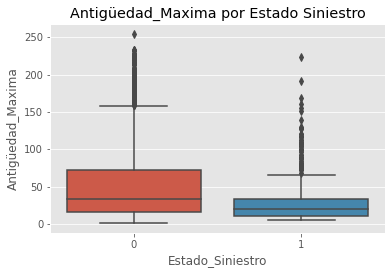

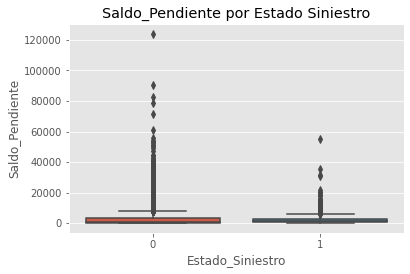

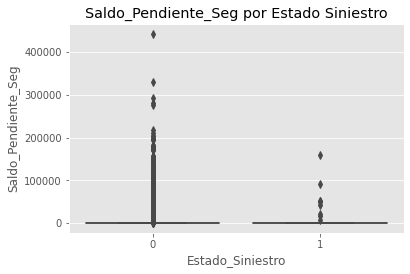

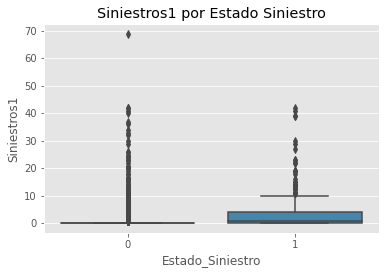

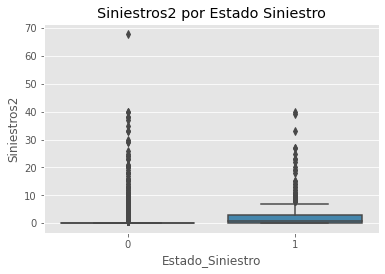

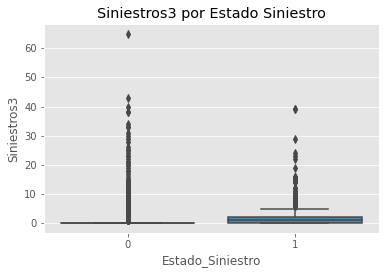

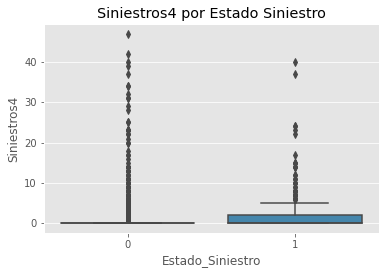

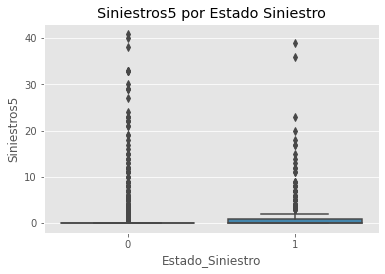

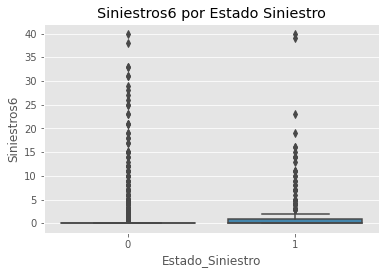

In [ ]:
Estado_Siniestro = 'Estado_Siniestro'
for i in cols_num: 
  graficar_nums(Estado_Siniestro, i, df_siniestro)

In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Antigüedad_Maxima'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Antigüedad_Maxima'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# La antiguedad maxima aporta información a la variable dependiente estado siniestro

Estadístico=9.642, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Saldo_Pendiente'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Saldo_Pendiente'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El saldo pendiente no aporta información a la variable, procederia la prueba U de Mann-Whitney

Estadístico=1.315, p-value=0.189


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Saldo_Pendiente_Seg'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Saldo_Pendiente_Seg'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El saldo pendiente de la poliza aporta información a la variable estado siniestros

Estadístico=4.212, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros1'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros1'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro1 aporta información a la variable estado siniestros

Estadístico=-19.768, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros2'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros2'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro2 aporta información a la variable estado siniestros

Estadístico=-16.788, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros3'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros3'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro3 aporta información a la variable estado siniestros

Estadístico=-13.186, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros4'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros4'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro4 aporta información a la variable estado siniestros

Estadístico=-11.826, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros5'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros5'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro5 aporta información a la variable estado siniestros

Estadístico=-10.084, p-value=0.000


In [ ]:
# T-test diferencias
res_ttest = ttest_ind(
                x1 = df_siniestro[df_siniestro['Estado_Siniestro'] ==0]['Siniestros6'],
                x2 = df_siniestro[df_siniestro['Estado_Siniestro'] ==1]['Siniestros6'],
                alternative='two-sided'
            )
print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))
# El siniestro6 aporta información a la variable estado siniestros

Estadístico=-9.014, p-value=0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas (ordinales y nominales)
# Ho: Las variables A y B son mutuamente independientes.
# Ha: Las variables A y B son mutuamente dependientes.
# Nivel de significancia: 5
contingencia= pd.crosstab(df_siniestro['Nivel_Ingresos'], df_siniestro['Estado_Siniestro']) 
contingencia

Estado_Siniestro,0,1
Nivel_Ingresos,,
0,1667,248
1,2560,209
2,264,19
3,518,11
4,239,9
5,56,0


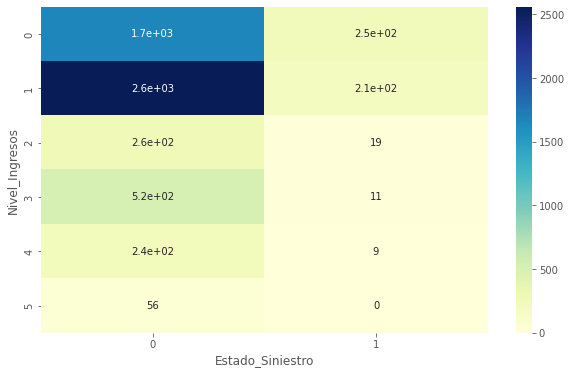

In [ ]:
# Mapa de calor de las variables cualitativas
plt.figure(figsize=(10,6)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el nivel de ingresos tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia1= pd.crosstab(df_siniestro['Puntaje_Morosidad1'], df_siniestro['Estado_Siniestro']) 
contingencia1

Estado_Siniestro,0,1
Puntaje_Morosidad1,,
0,4952,206
1,250,113
2,41,86
3,11,91
4,26,0
5,15,0
6,9,0


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia1)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad1 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia2= pd.crosstab(df_siniestro['Puntaje_Morosidad2'], df_siniestro['Estado_Siniestro']) 
contingencia2

Estado_Siniestro,0,1
Puntaje_Morosidad2,,
0,4913,214
1,258,132
2,37,100
3,29,29
4,19,3
5,8,1
6,40,17


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia2)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad2 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia3= pd.crosstab(df_siniestro['Puntaje_Morosidad3'], df_siniestro['Estado_Siniestro']) 
contingencia3

Estado_Siniestro,0,1
Puntaje_Morosidad3,,
0,4927,244
1,243,151
2,52,63
3,29,15
4,12,3
5,4,1
6,37,19


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia3)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad3 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia4= pd.crosstab(df_siniestro['Puntaje_Morosidad4'], df_siniestro['Estado_Siniestro']) 
contingencia4

Estado_Siniestro,0,1
Puntaje_Morosidad4,,
0,4948,278
1,243,142
2,54,44
3,18,10
4,3,2
5,7,6
6,31,14


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia4)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad4 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia5= pd.crosstab(df_siniestro['Puntaje_Morosidad5'], df_siniestro['Estado_Siniestro']) 
contingencia5

Estado_Siniestro,0,1
Puntaje_Morosidad5,,
0,4933,300
1,275,116
2,46,50
3,10,8
4,7,8
5,7,3
6,26,11


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia5)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad5 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia6= pd.crosstab(df_siniestro['Puntaje_Morosidad6'], df_siniestro['Estado_Siniestro']) 
contingencia6

Estado_Siniestro,0,1
Puntaje_Morosidad6,,
0,4935,325
1,278,114
2,42,30
3,14,11
4,7,4
5,6,1
6,22,11


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia6)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad6 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia7= pd.crosstab(df_siniestro['nivel_ingresos_0'], df_siniestro['Estado_Siniestro']) 
contingencia7

Estado_Siniestro,0,1
nivel_ingresos_0,,
0,3637,248
1,1667,248


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia7)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el nivel de ingresos0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia8= pd.crosstab(df_siniestro['puntaje_morosidad_1_0'], df_siniestro['Estado_Siniestro']) 
contingencia8

Estado_Siniestro,0,1
puntaje_morosidad_1_0,,
0,352,290
1,4952,206


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia8)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad1_0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia9= pd.crosstab(df_siniestro['puntaje_morosidad_2_0'], df_siniestro['Estado_Siniestro']) 
contingencia9

Estado_Siniestro,0,1
puntaje_morosidad_2_0,,
0,391,282
1,4913,214


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia9)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad2_0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia10= pd.crosstab(df_siniestro['puntaje_morosidad_3_0'], df_siniestro['Estado_Siniestro']) 
contingencia10

Estado_Siniestro,0,1
puntaje_morosidad_3_0,,
0,377,252
1,4927,244


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia10)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad3_0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia11= pd.crosstab(df_siniestro['puntaje_morosidad_4_0'], df_siniestro['Estado_Siniestro']) 
contingencia11

Estado_Siniestro,0,1
puntaje_morosidad_4_0,,
0,356,218
1,4948,278


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia11)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad4_0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia12= pd.crosstab(df_siniestro['puntaje_morosidad_5_0'], df_siniestro['Estado_Siniestro']) 
contingencia12

Estado_Siniestro,0,1
puntaje_morosidad_5_0,,
0,371,196
1,4933,300


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia12)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad5_0 tiene información para explicar el estado siniestro de los clientes

p-value = 0.000


In [ ]:
# Pruebla Chi-Square para variables cualitativas 
contingencia13= pd.crosstab(df_siniestro['puntaje_morosidad_6_0'], df_siniestro['Estado_Siniestro']) 
contingencia13

Estado_Siniestro,0,1
puntaje_morosidad_6_0,,
0,369,171
1,4935,325


In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia13)
# Print the p-value
print('p-value = %.3f'% p)
# Son mutuamente dependientes, el puntaje de morosidad6_0 tiene información para explicar el estado siniestro de los clientes
# Conclusion, de acuerdo con las pruebas parametricas y no parametricas podemos concluir que la mayoria de las variables aportan información
# al estado del riesgo de los clientes del banco, la unica que no aporta información es el saldo pendiente, por lo que se excluye del modelo

p-value = 0.000


In [ ]:
# Generamos una copia del anterior dataframe 
df_siniestro1=df_siniestro.copy()
df_siniestro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Antigüedad_Maxima      5800 non-null   float64
 1   Saldo_Pendiente        5800 non-null   float64
 2   Saldo_Pendiente_Seg    5800 non-null   float64
 3   Siniestros1            5800 non-null   float64
 4   Siniestros2            5800 non-null   float64
 5   Siniestros3            5800 non-null   float64
 6   Siniestros4            5800 non-null   float64
 7   Siniestros5            5800 non-null   float64
 8   Siniestros6            5800 non-null   float64
 9   Nivel_Ingresos         5800 non-null   int64  
 10  Puntaje_Morosidad1     5800 non-null   int64  
 11  Puntaje_Morosidad2     5800 non-null   int64  
 12  Puntaje_Morosidad3     5800 non-null   int64  
 13  Puntaje_Morosidad4     5800 non-null   int64  
 14  Puntaje_Morosidad5     5800 non-null   int64  
 15  Punt

In [ ]:
# Quitamos el saldo pendiente de acuerdo con la prueba parametrica 
df_siniestro1.drop(['Saldo_Pendiente'], axis=1, inplace=True)
df_siniestro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Antigüedad_Maxima      5800 non-null   float64
 1   Saldo_Pendiente_Seg    5800 non-null   float64
 2   Siniestros1            5800 non-null   float64
 3   Siniestros2            5800 non-null   float64
 4   Siniestros3            5800 non-null   float64
 5   Siniestros4            5800 non-null   float64
 6   Siniestros5            5800 non-null   float64
 7   Siniestros6            5800 non-null   float64
 8   Nivel_Ingresos         5800 non-null   int64  
 9   Puntaje_Morosidad1     5800 non-null   int64  
 10  Puntaje_Morosidad2     5800 non-null   int64  
 11  Puntaje_Morosidad3     5800 non-null   int64  
 12  Puntaje_Morosidad4     5800 non-null   int64  
 13  Puntaje_Morosidad5     5800 non-null   int64  
 14  Puntaje_Morosidad6     5800 non-null   int64  
 15  Esta

In [ ]:
# Quitamos la variable segmento y queda la variable segmento con categorias 0 al 4 identificando los 5 segmentos generados
df_siniestro1.drop(['Segmento'], axis=1, inplace=True)
df_siniestro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Antigüedad_Maxima      5800 non-null   float64
 1   Saldo_Pendiente_Seg    5800 non-null   float64
 2   Siniestros1            5800 non-null   float64
 3   Siniestros2            5800 non-null   float64
 4   Siniestros3            5800 non-null   float64
 5   Siniestros4            5800 non-null   float64
 6   Siniestros5            5800 non-null   float64
 7   Siniestros6            5800 non-null   float64
 8   Nivel_Ingresos         5800 non-null   int64  
 9   Puntaje_Morosidad1     5800 non-null   int64  
 10  Puntaje_Morosidad2     5800 non-null   int64  
 11  Puntaje_Morosidad3     5800 non-null   int64  
 12  Puntaje_Morosidad4     5800 non-null   int64  
 13  Puntaje_Morosidad5     5800 non-null   int64  
 14  Puntaje_Morosidad6     5800 non-null   int64  
 15  Esta

In [ ]:
X_data = df_siniestro1.drop(columns = ['Estado_Siniestro']) # Variables independientes
Y_data = df_siniestro1['Estado_Siniestro'] # Variable dependiente

In [ ]:
cols = X_data.columns # Incorporamos 64 variables independientes
len(cols)

64

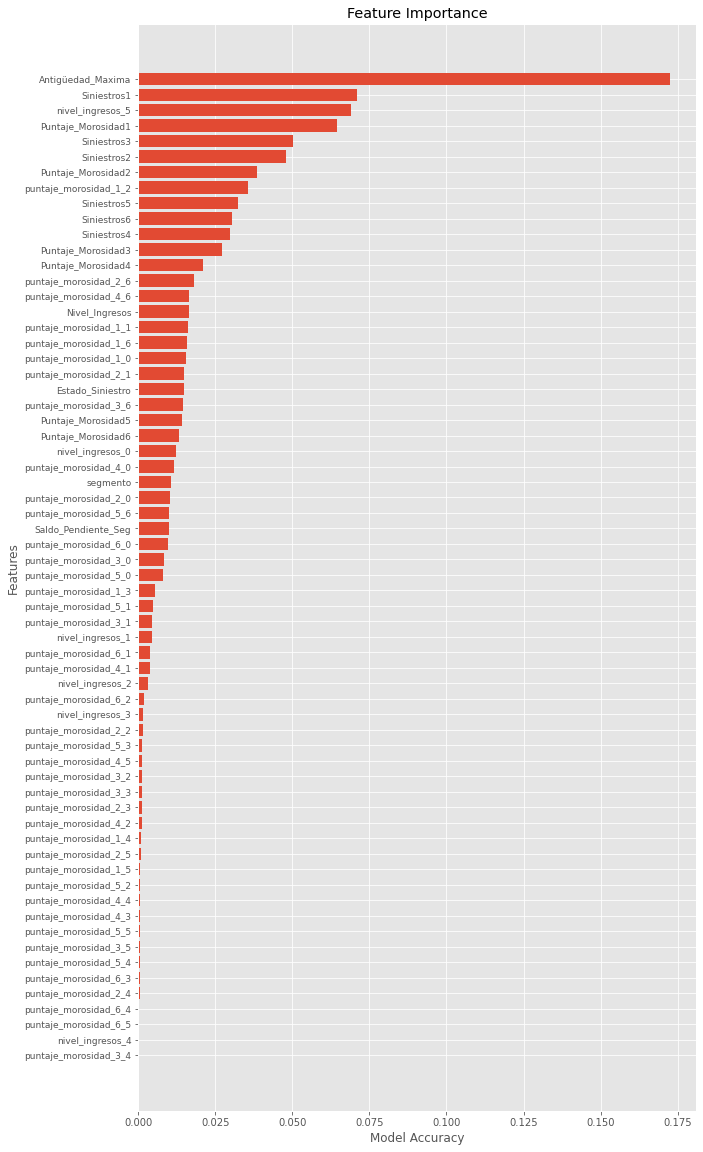

In [ ]:
# Importancia de las variables
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_data, Y_data)
importances = forest.feature_importances_
ranking = np.argsort(importances)
# Visualizamos el orden de importancia
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(X_data.shape[1]), importances[ranking])
plt.yticks(range(X_data.shape[1]), df_siniestro1.columns[ranking], fontsize=9)
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.show()

In [ ]:
# Generamos las variables independientes mas importantes o que aportan más información 
X_dat = df_siniestro1.loc[:, ['Antigüedad_Maxima', 'Siniestros1', 'nivel_ingresos_5', 'Puntaje_Morosidad1', 'Siniestros3', 'Siniestros2',
                             'Puntaje_Morosidad2', 'puntaje_morosidad_1_2', 'Siniestros5', 'Siniestros6', 'Siniestros4', 'Puntaje_Morosidad3',
                             'Puntaje_Morosidad4', 'puntaje_morosidad_2_6', 'puntaje_morosidad_4_6', 'segmento']]
X_dat.head(6)


,Antigüedad_Maxima,Siniestros1,nivel_ingresos_5,Puntaje_Morosidad1,Siniestros3,Siniestros2,Puntaje_Morosidad2,puntaje_morosidad_1_2,Siniestros5,Siniestros6,Siniestros4,Puntaje_Morosidad3,Puntaje_Morosidad4,puntaje_morosidad_2_6,puntaje_morosidad_4_6,segmento
0,44.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,2
1,79.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0
2,102.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0
3,34.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,2
4,109.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0
5,183.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
# Generamos la variable dependiente
Y_dat = df_siniestro1.loc[:, ['Estado_Siniestro']] 
Y_dat.head(6)

,Estado_Siniestro
0,0
1,0
2,0
3,0
4,0
5,0


In [ ]:
# Agregamos la constante al modelo
X_dat = sm.add_constant(X_dat, prepend=True)

In [ ]:
# Creación del modelo logistico
modelo = sm.Logit(endog=Y_dat, exog=X_dat,)
modelo = modelo.fit()
print(modelo.summary())
# La pseudo r-squared tiene una metrica baja, es necesario incoporar nuevas variables y por ende darles el tratamiento especifico

         Current function value: 0.221891
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Estado_Siniestro   No. Observations:                 5800
Model:                          Logit   Df Residuals:                     5783
Method:                           MLE   Df Model:                           16
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.2402
Time:                        21:11:26   Log-Likelihood:                -1287.0
converged:                      False   LL-Null:                       -1693.8
Covariance Type:            nonrobust   LLR p-value:                7.357e-163
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3870      0.223    -10.708      0.000      -2.824      -1.950
Antigüedad_Maxima        -0.0121

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-2.823945e+00,-1.950096e+00
Antigüedad_Maxima,-1.629861e-02,-7.909380e-03
Siniestros1,1.878222e-01,4.297137e-01
nivel_ingresos_5,-1.187260e+06,1.187206e+06
Puntaje_Morosidad1,2.042297e-01,5.746626e-01
Siniestros3,-5.528889e-01,-2.305020e-01
Siniestros2,-1.448731e-01,2.024580e-01
Puntaje_Morosidad2,-5.146512e-03,5.154806e-01
puntaje_morosidad_1_2,1.250886e+00,2.154868e+00
Siniestros5,-3.147525e-01,7.599274e-02


In [ ]:
# Predicciones con intervalo de confianza 
import numpy as np
predicciones = modelo.predict(exog = X_dat)
# Clasificación de las predicciones
clasificacion = np.where(predicciones < 0.9, 0, 1)  # ---> nro 0 / n 
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Matriz de confusión de las predicciones
confusion_matrix = pd.crosstab(
    Y_data.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix
# Hay un problema en los unos, ya que hay unos clasificados como ceros, el modelo solo fue capaz de predecir 17. 

Predicción,0,1
Real,,
0,5286,18
1,479,17


In [ ]:
# Estimamos otras metricas. 
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = Y_dat,
        y_pred = clasificacion
    )
)
# Con este modelo solo es posible  es capaz de identificar un 3% de los clientes propensos a una situación de siniestros, por lo que 
# debe ser mejorado con mayor información, nuevas variables y un mejor tratamiento. 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5304
           1       0.49      0.03      0.06       496

    accuracy                           0.91      5800
   macro avg       0.70      0.52      0.51      5800
weighted avg       0.88      0.91      0.88      5800

